# Import Library

In [1]:
!pip install fbprophet

In [2]:
# import fbprophet
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
import json
import numpy as np
import pandas as pd
import requests
import datetime

# Prediksi COVID-19 di Indonesia

# Preprocessing Data

In [4]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [5]:
url_id = 'https://api.covid19api.com/dayone/country/indonesia'

In [6]:
df_id = pd.json_normalize(get_json(url_id))
print(df_id.head())

                                     ID  ...                  Date
0  627dfb55-9bbf-4aaf-ac73-686b2abdb666  ...  2020-03-02T00:00:00Z
1  382b4437-d882-42ac-a704-50a9b213ac02  ...  2020-03-03T00:00:00Z
2  86f36f09-603a-4150-a813-bd4598065dbd  ...  2020-03-04T00:00:00Z
3  aa942a85-e437-40b7-af05-44df0e2a9ea8  ...  2020-03-05T00:00:00Z
4  b084462f-e2fc-4920-a84f-c6b5ae2f0ebf  ...  2020-03-06T00:00:00Z

[5 rows x 13 columns]


In [7]:
df_id

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,627dfb55-9bbf-4aaf-ac73-686b2abdb666,Indonesia,ID,,,,-0.79,113.92,2,0,0,2,2020-03-02T00:00:00Z
1,382b4437-d882-42ac-a704-50a9b213ac02,Indonesia,ID,,,,-0.79,113.92,2,0,0,2,2020-03-03T00:00:00Z
2,86f36f09-603a-4150-a813-bd4598065dbd,Indonesia,ID,,,,-0.79,113.92,2,0,0,2,2020-03-04T00:00:00Z
3,aa942a85-e437-40b7-af05-44df0e2a9ea8,Indonesia,ID,,,,-0.79,113.92,2,0,0,2,2020-03-05T00:00:00Z
4,b084462f-e2fc-4920-a84f-c6b5ae2f0ebf,Indonesia,ID,,,,-0.79,113.92,4,0,0,4,2020-03-06T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,caf6f8b8-69a4-40ae-a6c2-fce82d555a8e,Indonesia,ID,,,,-0.79,113.92,2911733,74920,2293875,542938,2021-07-19T00:00:00Z
505,9d0d9ec8-c134-49ff-9a5c-56baa27fccec,Indonesia,ID,,,,-0.79,113.92,2950058,76200,2323666,550192,2021-07-20T00:00:00Z
506,d9d29f7f-f914-4a7c-8541-63b66617d718,Indonesia,ID,,,,-0.79,113.92,2983830,77583,2356553,549694,2021-07-21T00:00:00Z
507,86eebbcc-c8e4-494a-8af9-2f2a189cc3d6,Indonesia,ID,,,,-0.79,113.92,3033339,79032,2392923,561384,2021-07-22T00:00:00Z


In [8]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           509 non-null    object
 1   Country      509 non-null    object
 2   CountryCode  509 non-null    object
 3   Province     509 non-null    object
 4   City         509 non-null    object
 5   CityCode     509 non-null    object
 6   Lat          509 non-null    object
 7   Lon          509 non-null    object
 8   Confirmed    509 non-null    int64 
 9   Deaths       509 non-null    int64 
 10  Recovered    509 non-null    int64 
 11  Active       509 non-null    int64 
 12  Date         509 non-null    object
dtypes: int64(4), object(9)
memory usage: 51.8+ KB


In [9]:
df_id['Date'] = pd.to_datetime(df_id['Date']).dt.date

In [10]:
df_id.tail()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
504,caf6f8b8-69a4-40ae-a6c2-fce82d555a8e,Indonesia,ID,,,,-0.79,113.92,2911733,74920,2293875,542938,2021-07-19
505,9d0d9ec8-c134-49ff-9a5c-56baa27fccec,Indonesia,ID,,,,-0.79,113.92,2950058,76200,2323666,550192,2021-07-20
506,d9d29f7f-f914-4a7c-8541-63b66617d718,Indonesia,ID,,,,-0.79,113.92,2983830,77583,2356553,549694,2021-07-21
507,86eebbcc-c8e4-494a-8af9-2f2a189cc3d6,Indonesia,ID,,,,-0.79,113.92,3033339,79032,2392923,561384,2021-07-22
508,2a5b421e-ef90-41f2-a4e7-a24977909fb6,Indonesia,ID,,,,-0.79,113.92,3033339,79032,2392923,561384,2021-07-23


In [11]:
df_conf_id = df_id[['Date','Confirmed']]

In [12]:
df_conf_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       509 non-null    object
 1   Confirmed  509 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.1+ KB


In [13]:
df_conf_id['Date'] = pd.to_datetime(df_conf_id['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df_conf_id.isnull().sum()

Date         0
Confirmed    0
dtype: int64

# Prediksi Kasus di Indonesia

In [15]:
from fbprophet import Prophet

In [16]:
df_conf1 = df_conf_id.copy()

In [17]:
df_conf1.columns

Index(['Date', 'Confirmed'], dtype='object')

In [18]:
df_conf1.columns=['ds','y']

In [19]:
model_id = Prophet(interval_width=0.95)
model_id.fit(df_conf1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future_id = model_id.make_future_dataframe(periods=60)

In [21]:
future_id.tail()

,ds
564,2021-09-17
565,2021-09-18
566,2021-09-19
567,2021-09-20
568,2021-09-21


In [22]:
forecast_conf_id = model_id.predict(future_id)

In [23]:
pd.options.display.float_format = '{: .2f}'.format

In [24]:
forecast_conf_id.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
564,2021-09-17,3058340.88,2863692.83,3266744.13,2939457.56,3166085.49,3521.39,3521.39,3521.39,3521.39,3521.39,3521.39,0.00,0.00,0.00,3061862.27
565,2021-09-18,3068213.66,2867808.25,3275948.10,2944926.15,3179628.90,-2728.96,-2728.96,-2728.96,-2728.96,-2728.96,-2728.96,0.00,0.00,0.00,3065484.70
566,2021-09-19,3078086.45,2876801.65,3277428.20,2950268.53,3193171.92,-2060.44,-2060.44,-2060.44,-2060.44,-2060.44,-2060.44,0.00,0.00,0.00,3076026.01
567,2021-09-20,3087959.23,2879894.71,3314868.78,2957034.38,3205718.04,-1287.69,-1287.69,-1287.69,-1287.69,-1287.69,-1287.69,0.00,0.00,0.00,3086671.54
568,2021-09-21,3097832.02,2894914.24,3319295.04,2964328.04,3217700.55,-522.73,-522.73,-522.73,-522.73,-522.73,-522.73,0.00,0.00,0.00,3097309.28


In [25]:
forecast_conf_id[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
564,2021-09-17,3061862.27,2863692.83,3266744.13
565,2021-09-18,3065484.70,2867808.25,3275948.10
566,2021-09-19,3076026.01,2876801.65,3277428.20
567,2021-09-20,3086671.54,2879894.71,3314868.78
568,2021-09-21,3097309.28,2894914.24,3319295.04


Text(0.5, 1.0, 'Prediksi Total Kasus Positif COVID-19 di Indonesia')

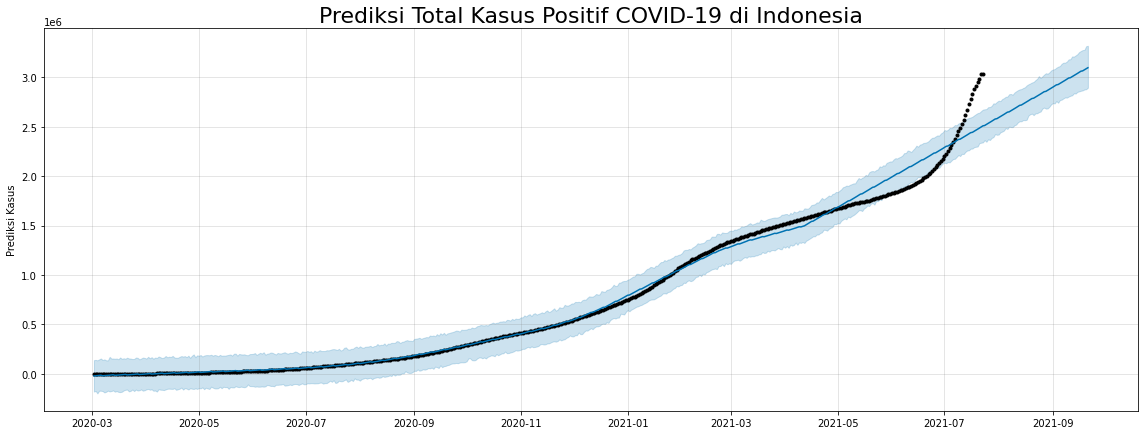

In [26]:
forecast_conf_plot_id = model_id.plot(forecast_conf_id, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')
ax = forecast_conf_plot_id.gca()
ax.set_title('Prediksi Total Kasus Positif COVID-19 di Indonesia', size=22)

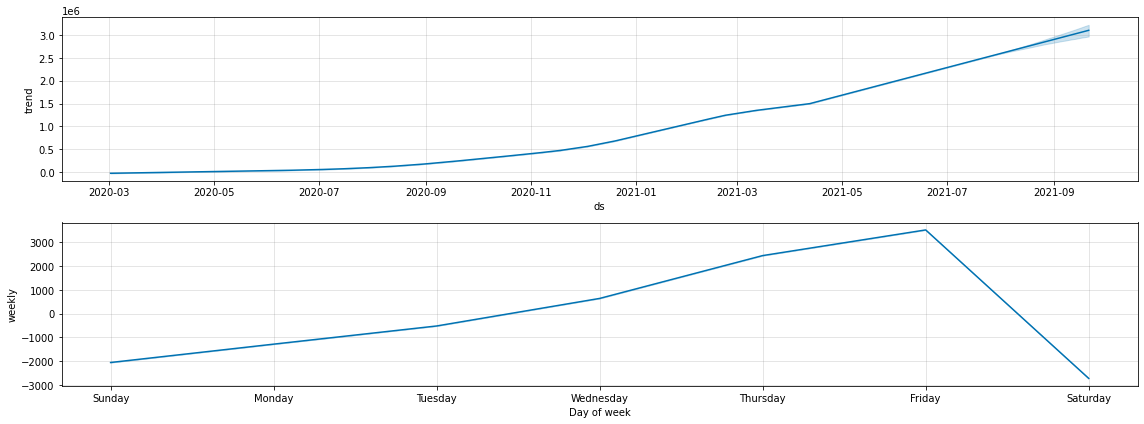

In [27]:
conf_forecast_plot_component_id = model_id.plot_components(forecast_conf_id, figsize=(16, 6))

# Cross-Validation the Time Series Model using Prophet - Indonesia

In [28]:
from fbprophet.plot import add_changepoints_to_plot

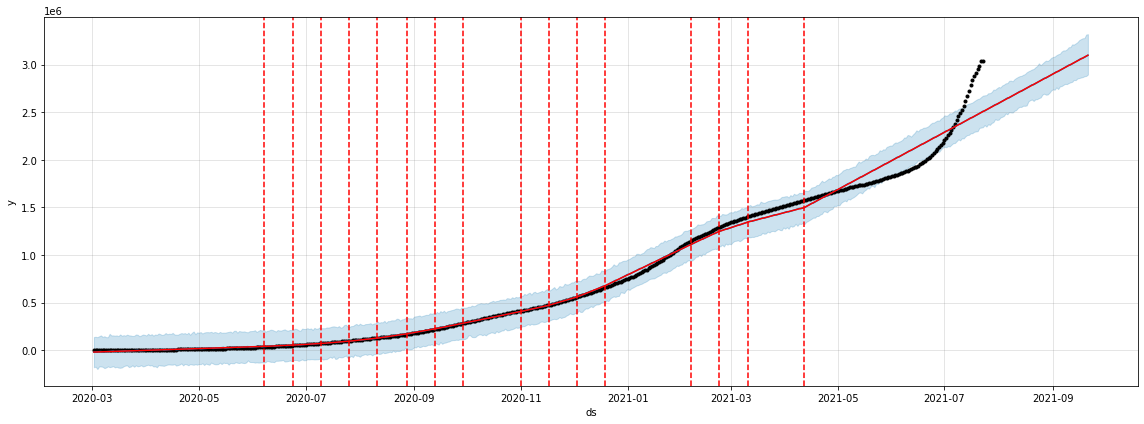

In [29]:
fig=model_id.plot(forecast_conf_id, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_id, forecast_conf_id)

In [30]:
from fbprophet.diagnostics import cross_validation

In [31]:
df_cv_id=cross_validation(model_id, horizon='60 days', period='30 days', initial='90 days')

INFO:fbprophet:Making 12 forecasts with cutoffs between 2020-06-28 00:00:00 and 2021-05-24 00:00:00


In [32]:
df_cv_id.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-29,54216.20,53875.77,54562.83,55092,2020-06-28
1,2020-06-30,55259.76,54930.93,55609.09,56385,2020-06-28
2,2020-07-01,56333.18,55935.44,56687.61,57770,2020-06-28
3,2020-07-02,57436.50,57000.28,57905.96,59394,2020-06-28
4,2020-07-03,58492.15,57898.15,58998.85,60695,2020-06-28


In [33]:
df_cv_id.shape

(720, 6)

# Obtain Performance Metrics for the Data - Indonesia

In [34]:
from fbprophet.diagnostics import performance_metrics

In [35]:
df_performance_id=performance_metrics(df_cv_id)

In [36]:
df_performance_id.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,1266990531.26,35594.81,23152.77,0.03,0.02,0.11
1,7 days,1427913501.51,37787.74,24795.74,0.03,0.03,0.11
2,8 days,1606741082.62,40084.17,26610.28,0.04,0.03,0.13
3,9 days,1794500032.75,42361.54,28493.72,0.04,0.04,0.13
4,10 days,1985505241.38,44559.01,30346.70,0.04,0.04,0.12


In [37]:
df_performance_id.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
50,56 days,70034214052.53,264639.78,187297.37,0.18,0.19,0.08
51,57 days,75955459557.43,275600.18,192810.83,0.18,0.19,0.08
52,58 days,81657115734.38,285757.09,197889.20,0.18,0.20,0.08
53,59 days,87563693052.07,295911.63,202852.21,0.18,0.20,0.08
54,60 days,92411859321.02,303993.19,207077.98,0.19,0.20,0.08


In [38]:
from fbprophet.plot import plot_cross_validation_metric

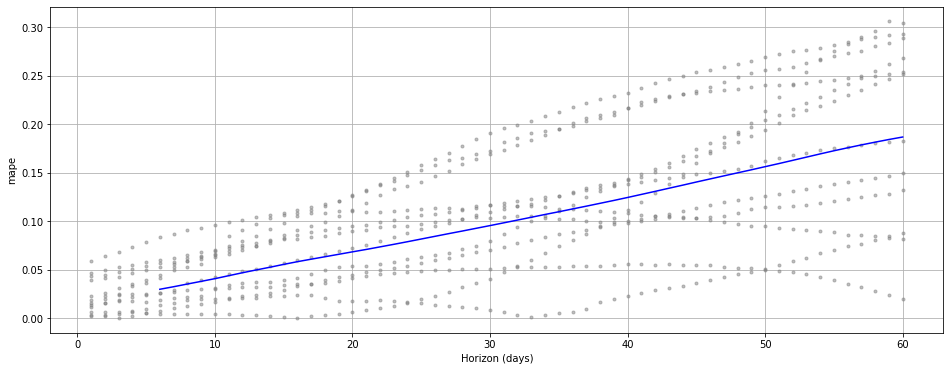

In [39]:
df_performance_id=plot_cross_validation_metric(df_cv_id, metric='mape', figsize=(16, 6))

# Visualisasi Data

# Visualisasi Data Kasus COVID-19 di Indonesia

<Figure size 432x288 with 0 Axes>

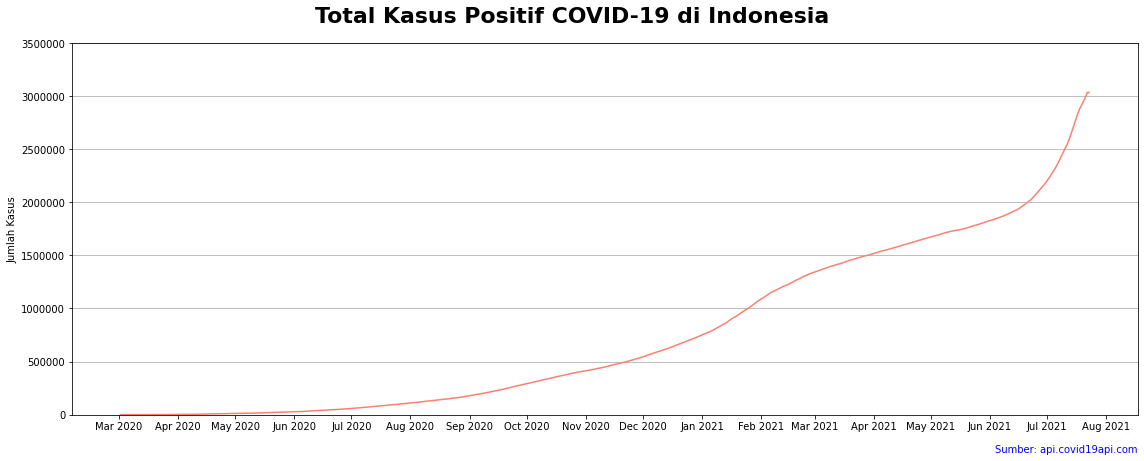

In [40]:
# Visualisasi Data Kasus Positif COVID-19 di Indonesia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_conf_id['Date'], df_conf_id['Confirmed'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di Indonesia', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: api.covid19api.com', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

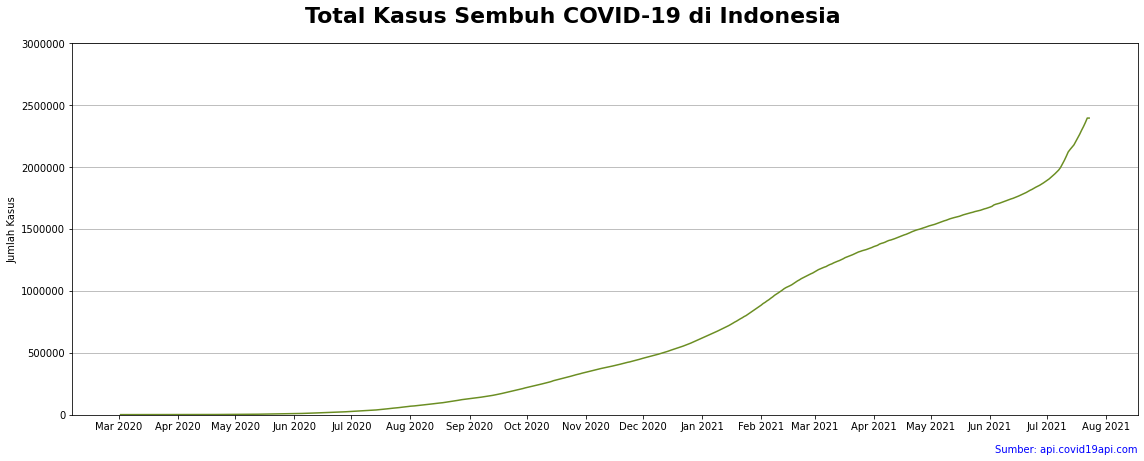

In [41]:
# Visualisasi Data Kasus Sembuh COVID-19 di Indonesia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_id['Date'], df_id['Recovered'], color='olivedrab')
fig.suptitle('Total Kasus Sembuh COVID-19 di Indonesia', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: api.covid19api.com', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

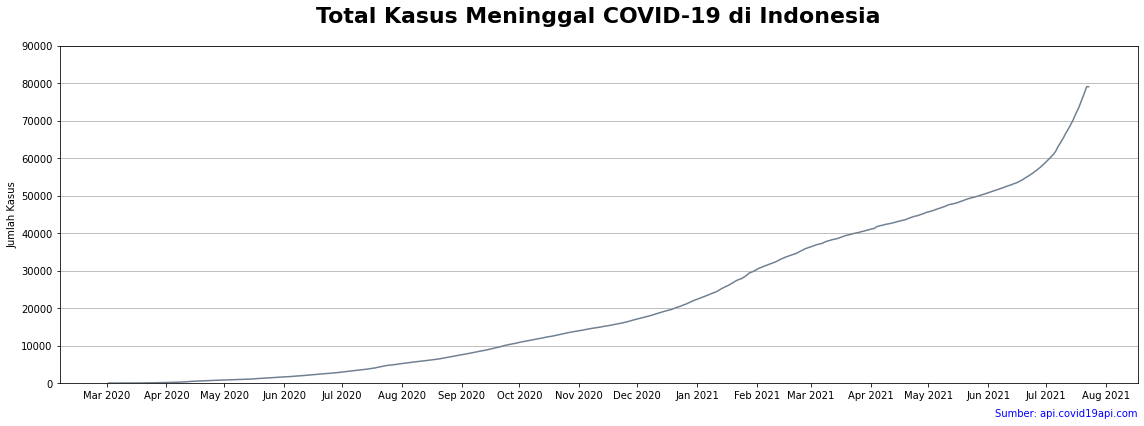

In [42]:
# Visualisasi Data Kasus Meninggal COVID-19 di Indonesia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_id['Date'], df_id['Deaths'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di Indonesia',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: api.covid19api.com', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

# 4 Provinsi di Indonesia dengan Jumlah Kasus COVID-19 Tertinggi

# DKI Jakarta

# Preprocessing Data

In [43]:
import requests
resp_jakarta = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json')
cov_jakarta_raw = resp_jakarta.json()

In [44]:
# Menggunakan method keys() pada cov_jakarta_raw untuk mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama:\n', cov_jakarta_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [45]:
# Berapa jumlah total kasus COVID-19 di DKI Jakarta?
# Berapa persentase kematian akibat COVID-19 di DKI Jakarta?
# Berapa persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta?

print('\nJumlah Total Kasus COVID-19 di DKI Jakarta                  : %d' %cov_jakarta_raw['kasus_total'])
print('Persentase Tingkat Kematian akibat COVID-19 di DKI Jakarta  : %f.2%%' %cov_jakarta_raw['meninggal_persen'])
print('Persentase Tingkat Kesembuhan dari COVID-19 di DKI Jakarta  : %f.2%%' %cov_jakarta_raw['sembuh_persen'])


Jumlah Total Kasus COVID-19 di DKI Jakarta                  : 770487
Persentase Tingkat Kematian akibat COVID-19 di DKI Jakarta  : 1.424294.2%
Persentase Tingkat Kesembuhan dari COVID-19 di DKI Jakarta  : 87.411209.2%


In [46]:
# Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. 
# Ekstrak data tersebut dari cov_jakarta_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. 
# Cek struktur cov_jakarta menggunakan method info() dan head().

import numpy as np
import pandas as pd
cov_jakarta = pd.DataFrame(cov_jakarta_raw['list_perkembangan'])
print('Info cov_jakarta:\n', cov_jakarta.info())
print('\nLima data teratas cov_jakarta:\n', cov_jakarta.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       509 non-null    int64
 1   KASUS                         509 non-null    int64
 2   MENINGGAL                     509 non-null    int64
 3   SEMBUH                        509 non-null    int64
 4   DIRAWAT_OR_ISOLASI            509 non-null    int64
 5   AKUMULASI_KASUS               509 non-null    int64
 6   AKUMULASI_SEMBUH              509 non-null    int64
 7   AKUMULASI_MENINGGAL           509 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  509 non-null    int64
dtypes: int64(9)
memory usage: 35.9 KB
Info cov_jakarta:
 None

Lima data teratas cov_jakarta:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583020800000      2  ...                    0                             2
1  1583107200

In [47]:
# Setelah mengekstrak dan mengamati cov_jakarta, Anda menemukan beberapa kejanggalan pada data tersebut. 
# Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

# Tahapan yang akan dilakukan untuk membersihkan data cov_jakarta, yaitu:

# Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
# Merubah format penulisan semua kolom menjadi huruf kecil
# Mengganti nama kolom kasus menjadi kasus_baru
# Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

cov_jakarta_tidy = (cov_jakarta.drop(columns=[item for item in cov_jakarta.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jakarta_tidy['tanggal'] = pd.to_datetime(cov_jakarta_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jakarta_tidy.head())
print('Lima data terbawah:\n', cov_jakarta_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-01           2          0       0
1 2020-03-02           2          0       0
2 2020-03-03           2          0       0
3 2020-03-04           2          0       0
4 2020-03-05           0          1       0
Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
504 2021-07-18        9128        158   11857
505 2021-07-19        5000        250   12674
506 2021-07-20        6213        268   12071
507 2021-07-21        5904         95   10546
508 2021-07-22        7058        195   10631


# Visualisasi Data Kasus COVID-19 di DKI Jakarta

<Figure size 432x288 with 0 Axes>

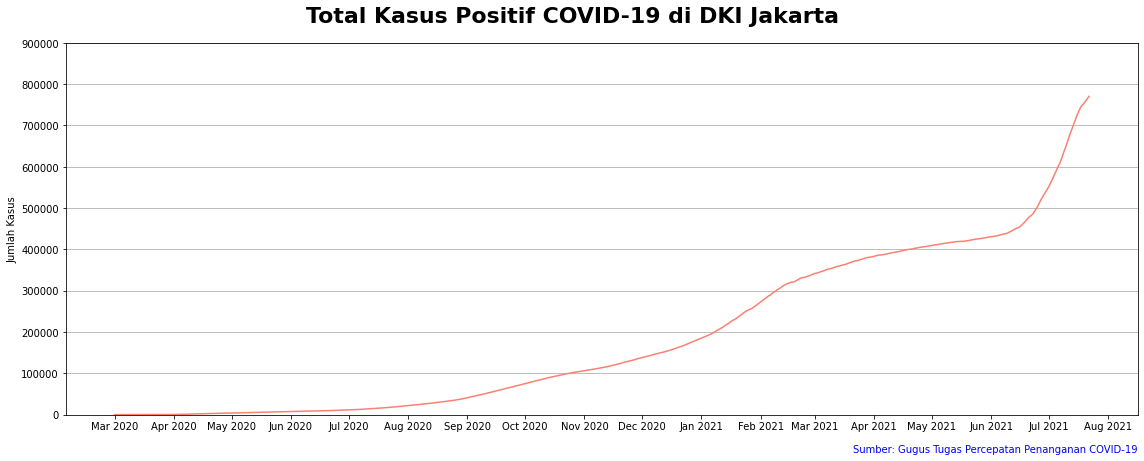

In [48]:
# Visualisasi Data Kasus Positif COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta['AKUMULASI_KASUS'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di DKI Jakarta', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

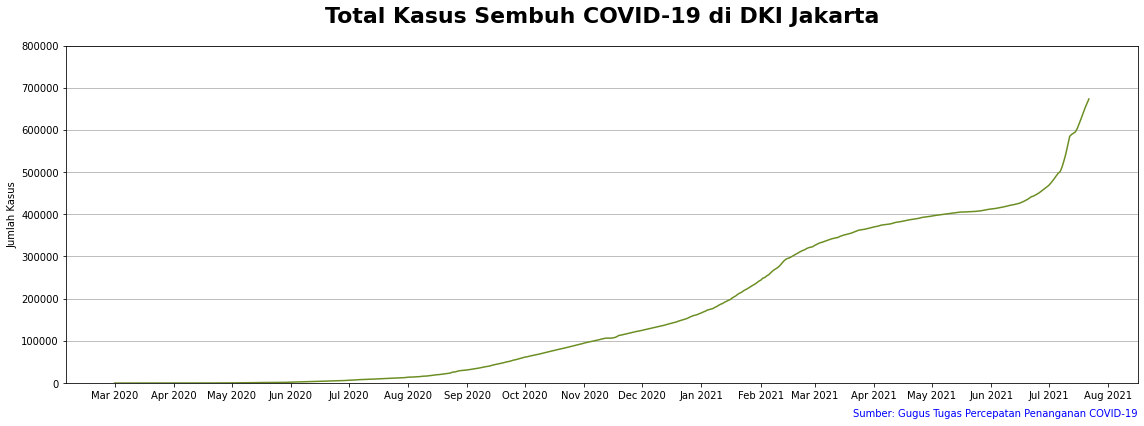

In [49]:
# Visualisasi Data Kasus Sembuh COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta['AKUMULASI_SEMBUH'], color='olivedrab')
ax.set_title('Total Kasus Sembuh COVID-19 di DKI Jakarta',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

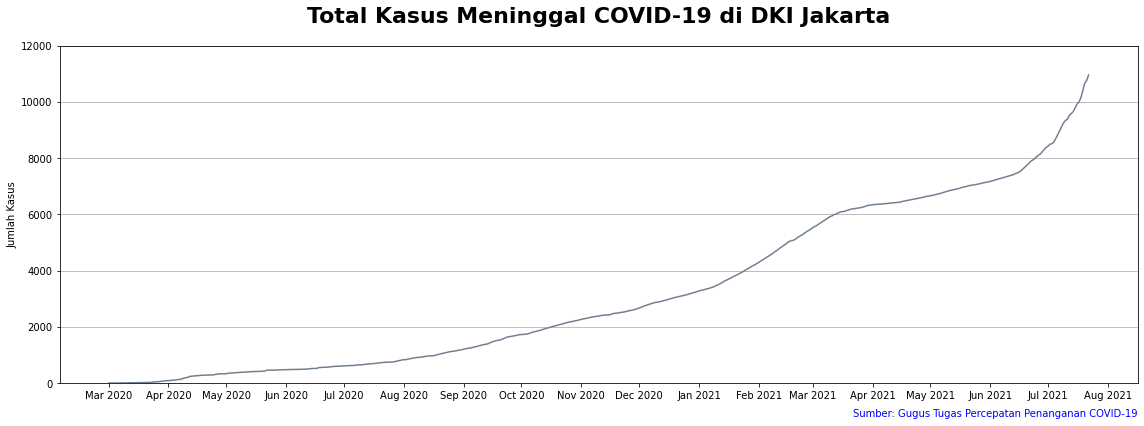

In [50]:
# Visualisasi Data Kasus Meninggal COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta['AKUMULASI_MENINGGAL'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di DKI Jakarta',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

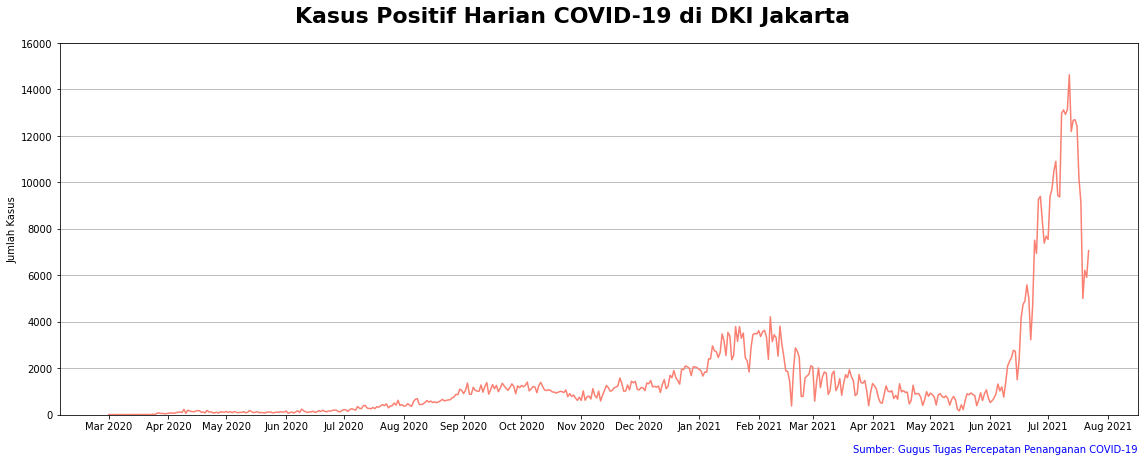

In [51]:
# Visualisasi Data Kasus Harian Positif COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta_tidy['kasus_baru'], color='salmon')
fig.suptitle('Kasus Positif Harian COVID-19 di DKI Jakarta', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

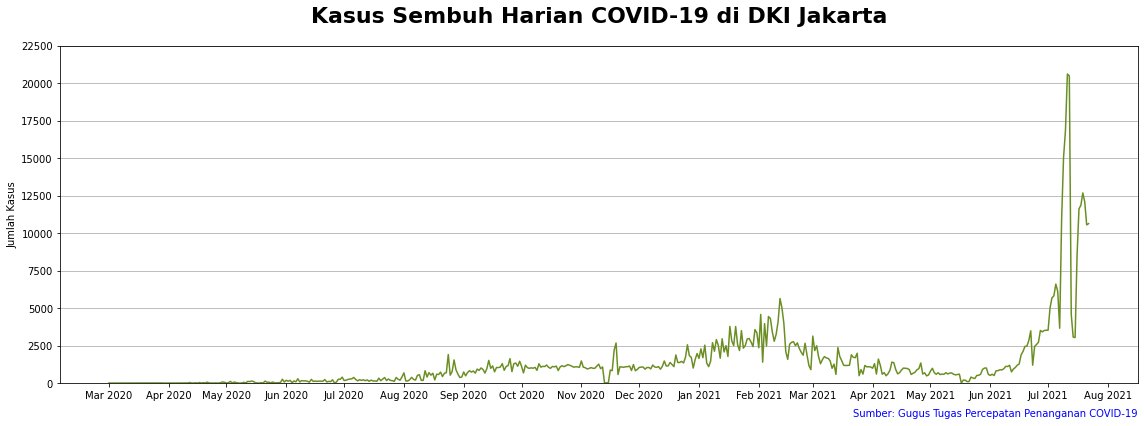

In [52]:
# Visualisasi Data Kasus Sembuh Harian COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta_tidy['sembuh'], color='olivedrab')
ax.set_title('Kasus Sembuh Harian COVID-19 di DKI Jakarta',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

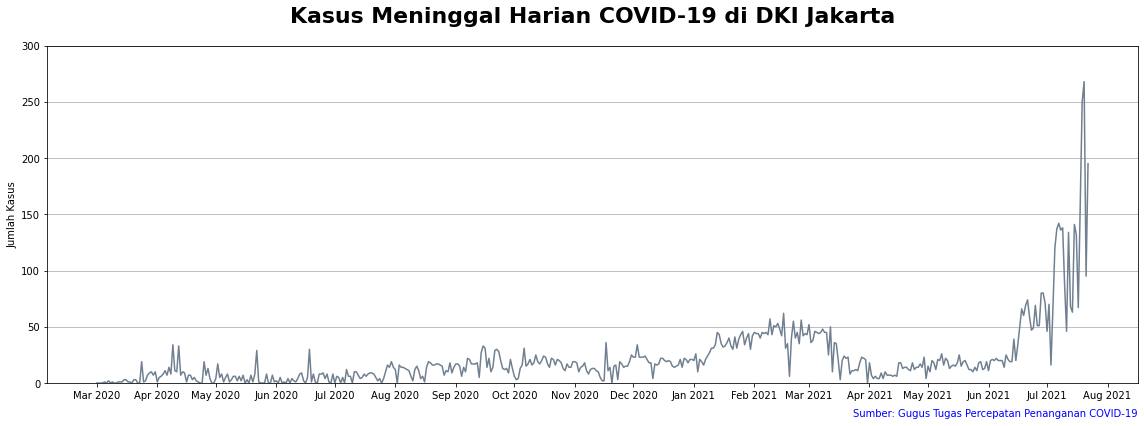

In [53]:
# Visualisasi Data Kasus Meninggal Harian COVID-19 di DKI Jakarta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jakarta_tidy['tanggal'], cov_jakarta_tidy['meninggal'], color='slategrey')
ax.set_title('Kasus Meninggal Harian COVID-19 di DKI Jakarta',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

# Jawa Barat

# Preprocessing Data

In [54]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [55]:
# Menggunakan method keys() pada cov_jabar_raw untuk mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [56]:
# Berapa jumlah total kasus COVID-19 di Jawa Barat?
# Berapa persentase kematian akibat COVID-19 di Jawa Barat?
# Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

print('\nJumlah Total Kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase Tingkat Kematian akibat COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])


Jumlah Total Kasus COVID-19 di Jawa Barat                 : 547254
Persentase Tingkat Kematian akibat COVID-19 di Jawa Barat : 1.419816.2%
Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Barat : 75.696477.2%


In [57]:
# Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. 
# Ekstrak data tersebut dari cov_jabar_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. 
# Cek struktur cov_jabar menggunakan method info() dan head().

import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       508 non-null    int64
 1   KASUS                         508 non-null    int64
 2   MENINGGAL                     508 non-null    int64
 3   SEMBUH                        508 non-null    int64
 4   DIRAWAT_OR_ISOLASI            508 non-null    int64
 5   AKUMULASI_KASUS               508 non-null    int64
 6   AKUMULASI_SEMBUH              508 non-null    int64
 7   AKUMULASI_MENINGGAL           508 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  508 non-null    int64
dtypes: int64(9)
memory usage: 35.8 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583107200000      3  ...                    0                             3
1  1583193600000 

In [58]:
# Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. 
# Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

# Tahapan yang akan dilakukan untuk membersihkan data cov_jabar, yaitu:

# Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
# Merubah format penulisan semua kolom menjadi huruf kecil
# Mengganti nama kolom kasus menjadi kasus_baru
# Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())
print('Lima data terbawah:\n', cov_jabar_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0
Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
503 2021-07-18        7777         91    3941
504 2021-07-19        7286         82    5219
505 2021-07-20        6928         70    3067
506 2021-07-21        5950        119    6895
507 2021-07-22       10499        141    7313


# Visualisasi Data Kasus COVID-19 di Jawa Barat

<Figure size 432x288 with 0 Axes>

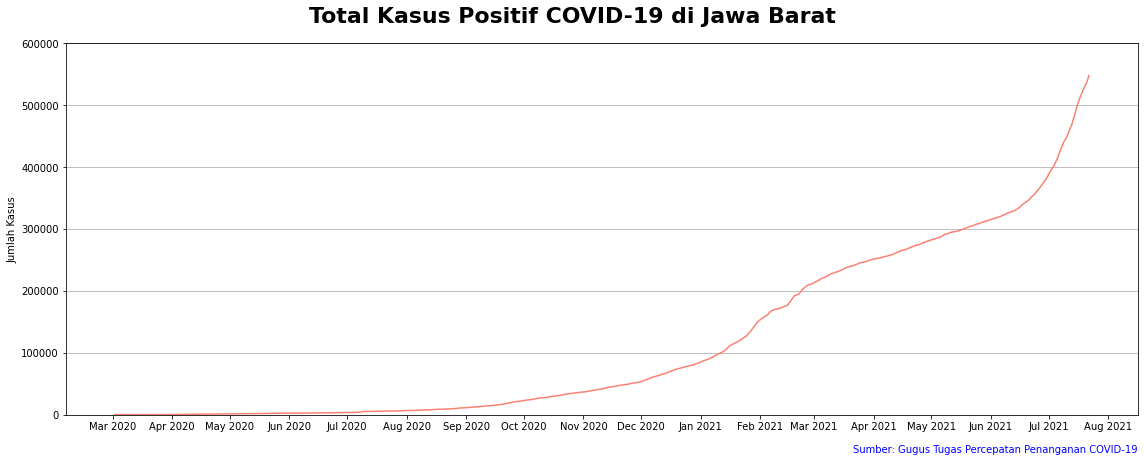

In [59]:
# Visualisasi Data Kasus Positif COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar['AKUMULASI_KASUS'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di Jawa Barat', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

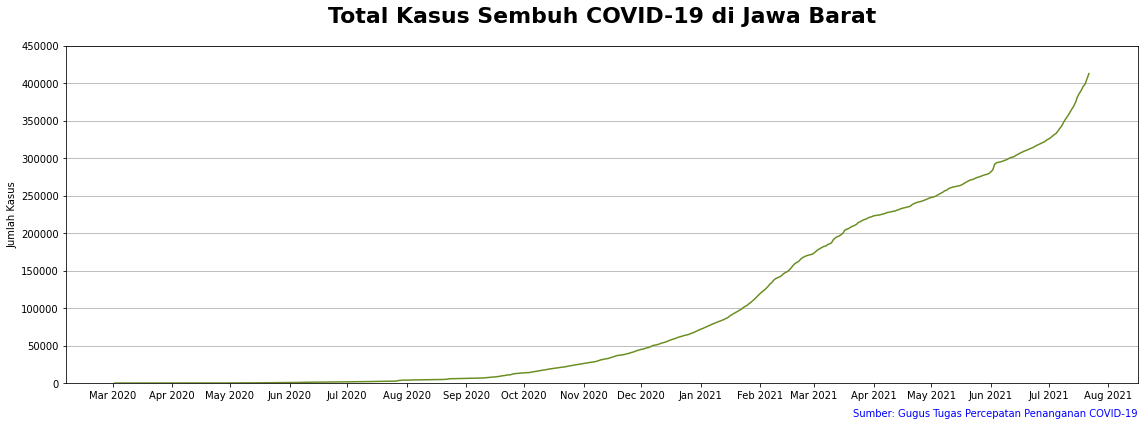

In [60]:
# Visualisasi Data Kasus Sembuh Harian COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar['AKUMULASI_SEMBUH'], color='olivedrab')
ax.set_title('Total Kasus Sembuh COVID-19 di Jawa Barat',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

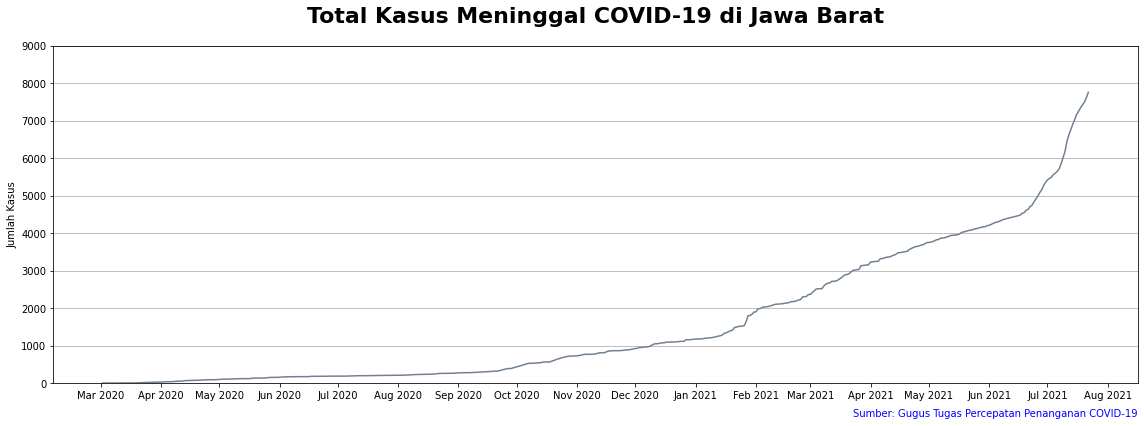

In [61]:
# Visualisasi Data Kasus Meninggal Harian COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar['AKUMULASI_MENINGGAL'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di Jawa Barat',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

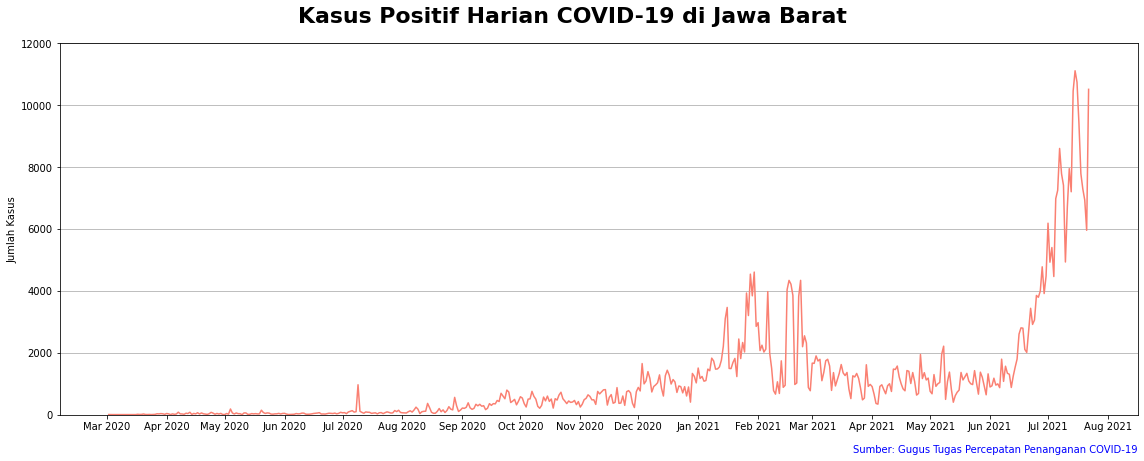

In [62]:
# Visualisasi Data Kasus Positif Harian COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar_tidy['kasus_baru'], color='salmon')
fig.suptitle('Kasus Positif Harian COVID-19 di Jawa Barat', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

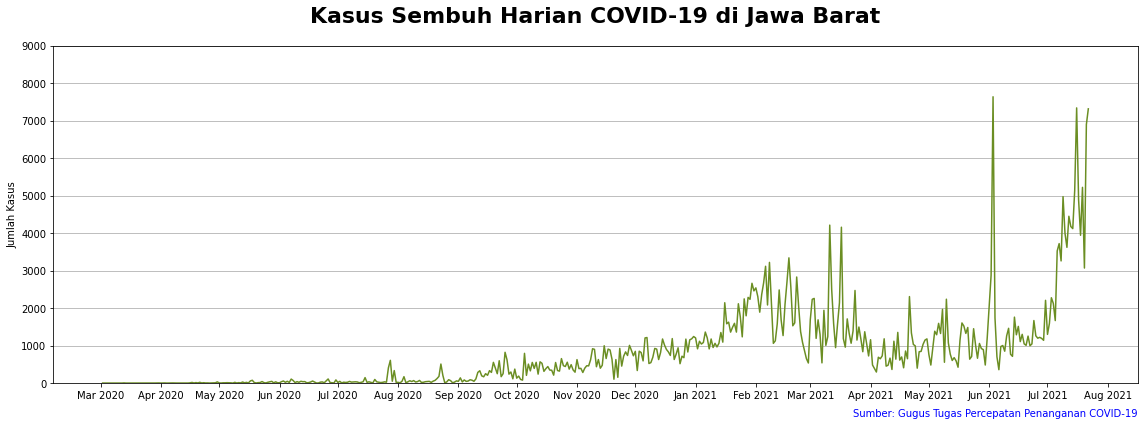

In [63]:
# Visualisasi Data Kasus Sembuh Harian COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar_tidy['sembuh'], color='olivedrab')
ax.set_title('Kasus Sembuh Harian COVID-19 di Jawa Barat',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

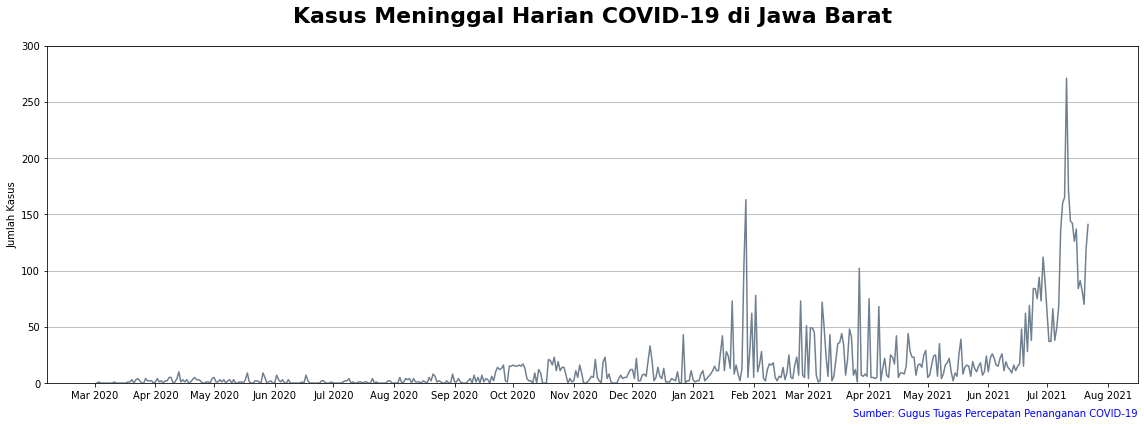

In [64]:
# Visualisasi Data Kasus Meninggal Harian COVID-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jabar_tidy['tanggal'], cov_jabar_tidy['meninggal'], color='slategrey')
ax.set_title('Kasus Meninggal Harian COVID-19 di Jawa Barat',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

# Jawa Tengah

# Preprocessing Data

In [65]:
import requests
resp_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_jateng_raw = resp_jateng.json()

In [66]:
# Menggunakan method keys() pada cov_jateng_raw untuk mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama:\n', cov_jateng_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [67]:
# Berapa jumlah total kasus COVID-19 di Jawa Tengah?
# Berapa persentase kematian akibat COVID-19 di Jawa Tengah?
# Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Tengah?

print('\nJumlah Total Kasus COVID-19 di Jawa Tengah                  : %d' %cov_jateng_raw['kasus_total'])
print('Persentase Tingkat Kematian akibat COVID-19 di Jawa Tengah  : %f.2%%' %cov_jateng_raw['meninggal_persen'])
print('Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Tengah  : %f.2%%' %cov_jateng_raw['sembuh_persen'])


Jumlah Total Kasus COVID-19 di Jawa Tengah                  : 338712
Persentase Tingkat Kematian akibat COVID-19 di Jawa Tengah  : 4.649673.2%
Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Tengah  : 77.770791.2%


In [68]:
# Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. 
# Ekstrak data tersebut dari cov_jateng_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. 
# Cek struktur cov_jateng menggunakan method info() dan head().

import numpy as np
import pandas as pd
cov_jateng = pd.DataFrame(cov_jateng_raw['list_perkembangan'])
print('Info cov_jateng:\n', cov_jateng.info())
print('\nLima data teratas cov_jateng:\n', cov_jateng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       502 non-null    int64
 1   KASUS                         502 non-null    int64
 2   MENINGGAL                     502 non-null    int64
 3   SEMBUH                        502 non-null    int64
 4   DIRAWAT_OR_ISOLASI            502 non-null    int64
 5   AKUMULASI_KASUS               502 non-null    int64
 6   AKUMULASI_SEMBUH              502 non-null    int64
 7   AKUMULASI_MENINGGAL           502 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  502 non-null    int64
dtypes: int64(9)
memory usage: 35.4 KB
Info cov_jateng:
 None

Lima data teratas cov_jateng:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583625600000      1  ...                    1                             0
1  158371200000

In [69]:
# Setelah mengekstrak dan mengamati cov_jateng, Anda menemukan beberapa kejanggalan pada data tersebut. 
# Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

# Tahapan yang akan dilakukan untuk membersihkan data cov_jateng, yaitu:

# Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
# Merubah format penulisan semua kolom menjadi huruf kecil
# Mengganti nama kolom kasus menjadi kasus_baru
# Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

cov_jateng_tidy = (cov_jateng.drop(columns=[item for item in cov_jateng.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jateng_tidy['tanggal'] = pd.to_datetime(cov_jateng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jateng_tidy.head())
print('Lima data terbawah:\n', cov_jateng_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0
Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
497 2021-07-18        4698        178    3420
498 2021-07-19        4042        278    3675
499 2021-07-20        3423        289    4146
500 2021-07-21        4125        386    3958
501 2021-07-22        5371        402    6084


# Visualisasi Data Kasus COVID-19 di Jawa Tengah

<Figure size 432x288 with 0 Axes>

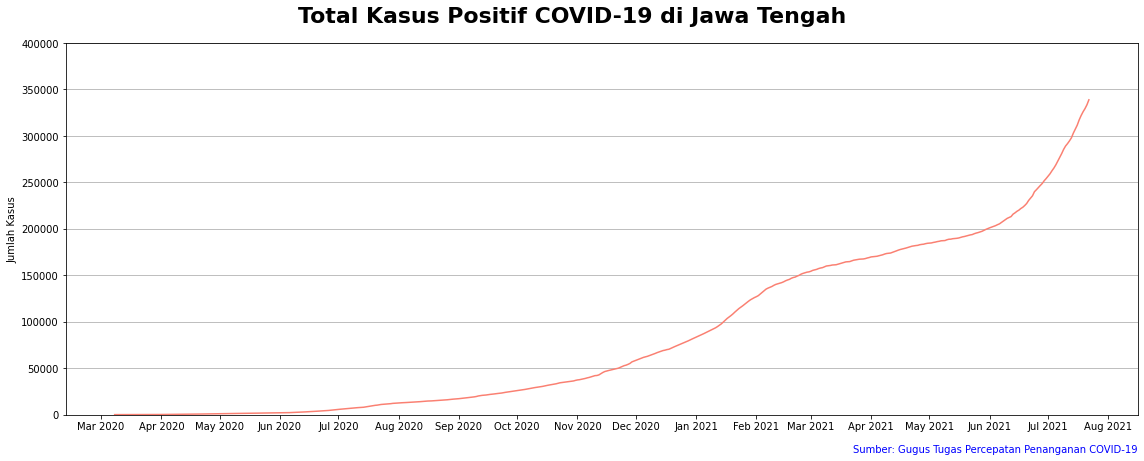

In [70]:
# Visualisasi Data Kasus Positif COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng['AKUMULASI_KASUS'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di Jawa Tengah', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

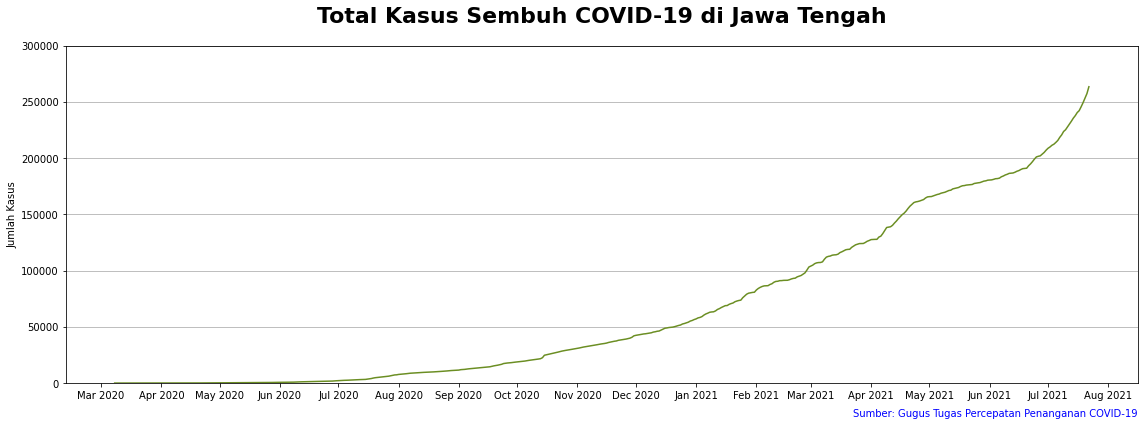

In [71]:
# Visualisasi Data Kasus Sembuh COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng['AKUMULASI_SEMBUH'], color='olivedrab')
ax.set_title('Total Kasus Sembuh COVID-19 di Jawa Tengah',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

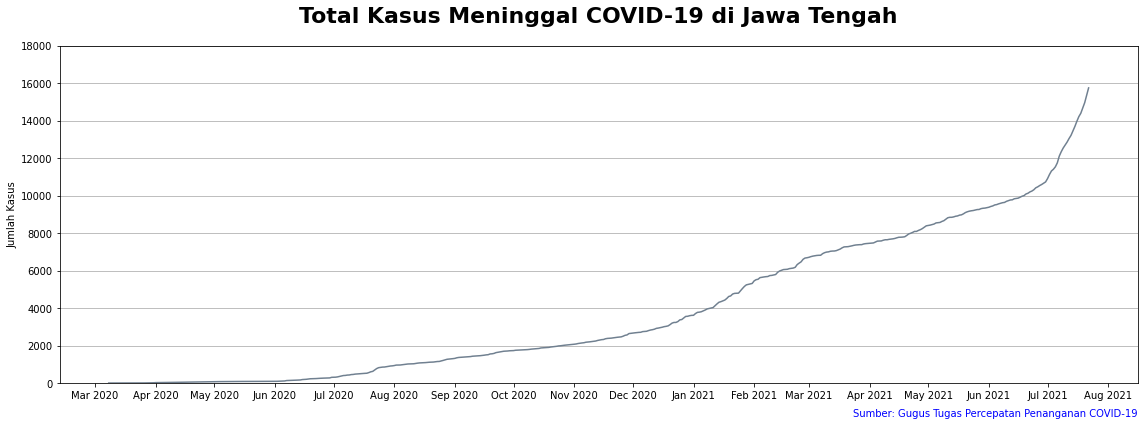

In [72]:
# Visualisasi Data Kasus Meninggal COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng['AKUMULASI_MENINGGAL'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di Jawa Tengah',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

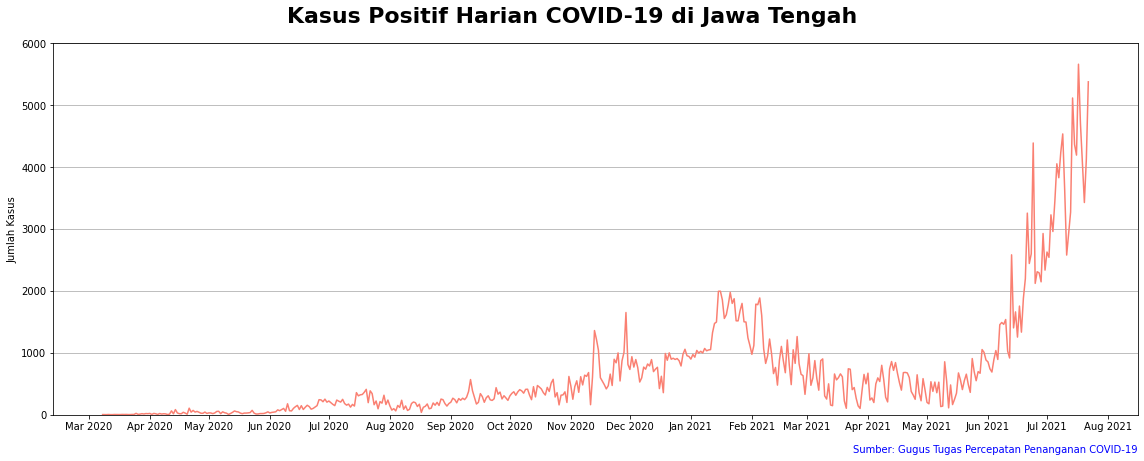

In [73]:
# Visualisasi Data Kasus Positif Harian COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng_tidy['kasus_baru'], color='salmon')
fig.suptitle('Kasus Positif Harian COVID-19 di Jawa Tengah', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

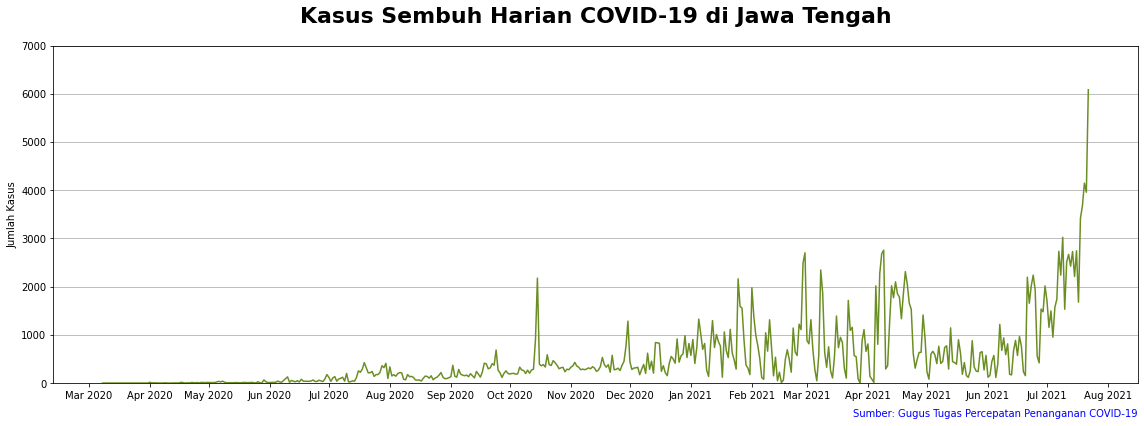

In [74]:
# Visualisasi Data Kasus Sembuh Harian COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng_tidy['sembuh'], color='olivedrab')
ax.set_title('Kasus Sembuh Harian COVID-19 di Jawa Tengah',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

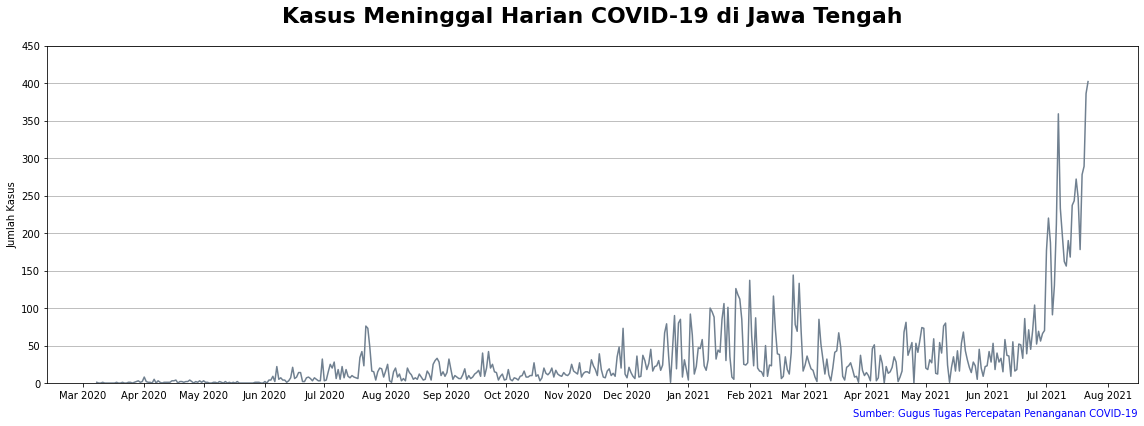

In [75]:
# Visualisasi Data Kasus Meninggal Harian COVID-19 di Jawa Tengah

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jateng_tidy['tanggal'], cov_jateng_tidy['meninggal'], color='slategrey')
ax.set_title('Kasus Meninggal Harian COVID-19 di Jawa Tengah',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

# Jawa Timur

# Preprocessing Data

In [76]:
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
cov_jatim_raw = resp_jatim.json()

In [77]:
# Menggunakan method keys() pada cov_jatim_raw untuk mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama:\n', cov_jatim_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [78]:
# Berapa jumlah total kasus COVID-19 di Jawa Timur?
# Berapa persentase kematian akibat COVID-19 di Jawa Timur?
# Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Timur?

print('\nJumlah Total Kasus COVID-19 di Jawa Timur                  : %d' %cov_jatim_raw['kasus_total'])
print('Persentase Tingkat Kematian akibat COVID-19 di Jawa Timur  : %f.2%%' %cov_jatim_raw['meninggal_persen'])
print('Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Timur  : %f.2%%' %cov_jatim_raw['sembuh_persen'])


Jumlah Total Kasus COVID-19 di Jawa Timur                  : 259727
Persentase Tingkat Kematian akibat COVID-19 di Jawa Timur  : 6.609247.2%
Persentase Tingkat Kesembuhan dari COVID-19 di Jawa Timur  : 73.208022.2%


In [79]:
# Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. 
# Ekstrak data tersebut dari cov_jatim_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. 
# Cek struktur cov_jatim menggunakan method info() dan head().

import numpy as np
import pandas as pd
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])
print('Info cov_jatim:\n', cov_jatim.info())
print('\nLima data teratas cov_jatim:\n', cov_jatim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       562 non-null    int64
 1   KASUS                         562 non-null    int64
 2   MENINGGAL                     562 non-null    int64
 3   SEMBUH                        562 non-null    int64
 4   DIRAWAT_OR_ISOLASI            562 non-null    int64
 5   AKUMULASI_KASUS               562 non-null    int64
 6   AKUMULASI_SEMBUH              562 non-null    int64
 7   AKUMULASI_MENINGGAL           562 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  562 non-null    int64
dtypes: int64(9)
memory usage: 39.6 KB
Info cov_jatim:
 None

Lima data teratas cov_jatim:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1578441600000      9  ...                    3                             5
1  1578528000000 

In [80]:
# Setelah mengekstrak dan mengamati cov_jatim, Anda menemukan beberapa kejanggalan pada data tersebut. 
# Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

# Tahapan yang akan dilakukan untuk membersihkan data cov_jatim, yaitu:

# Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
# Merubah format penulisan semua kolom menjadi huruf kecil
# Mengganti nama kolom kasus menjadi kasus_baru
# Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jatim_tidy.head())
print('Lima data terbawah:\n', cov_jatim_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-01-08           9          3       1
1 2020-01-09           0          1      23
2 2020-01-10           0          1      14
3 2020-01-11           0          3       8
4 2020-01-12           0          3       1
Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
557 2021-07-18        5727        326    3054
558 2021-07-19        4423        359    2864
559 2021-07-20        5654        268    2582
560 2021-07-21        3859        402    2980
561 2021-07-22        6625        279    3173


# Visualisasi Data Kasus COVID-19 di Jawa Timur

<Figure size 432x288 with 0 Axes>

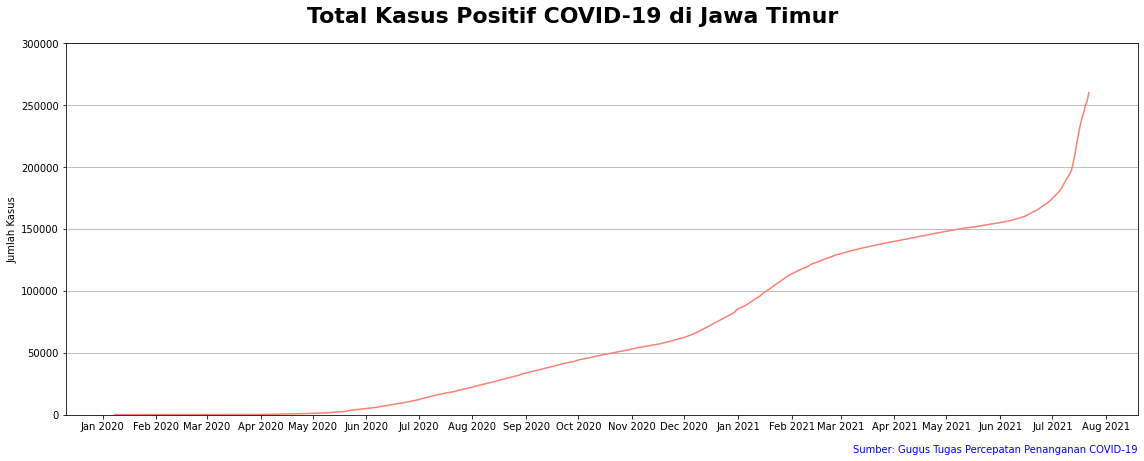

In [81]:
# Visualisasi Data Kasus Positif COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim['AKUMULASI_KASUS'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di Jawa Timur', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

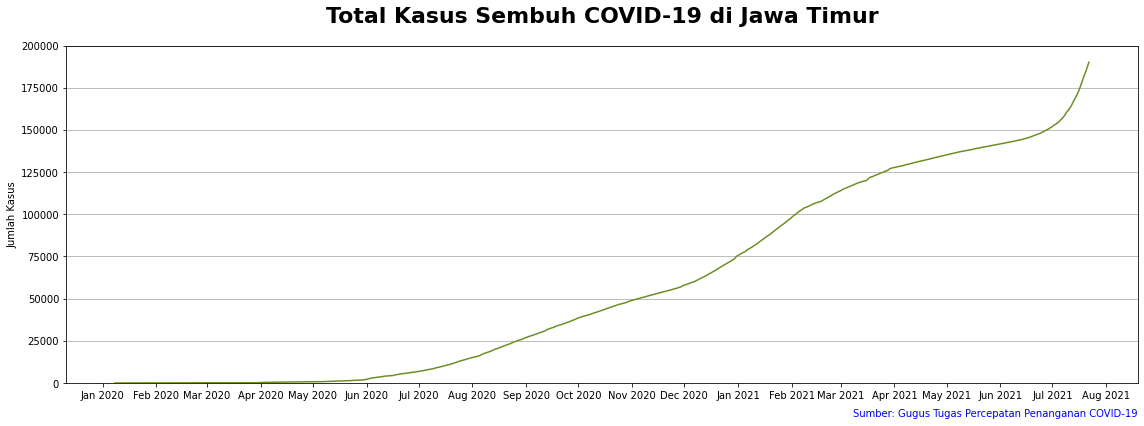

In [82]:
# Visualisasi Data Kasus Sembuh COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim['AKUMULASI_SEMBUH'], color='olivedrab')
ax.set_title('Total Kasus Sembuh COVID-19 di Jawa Timur',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

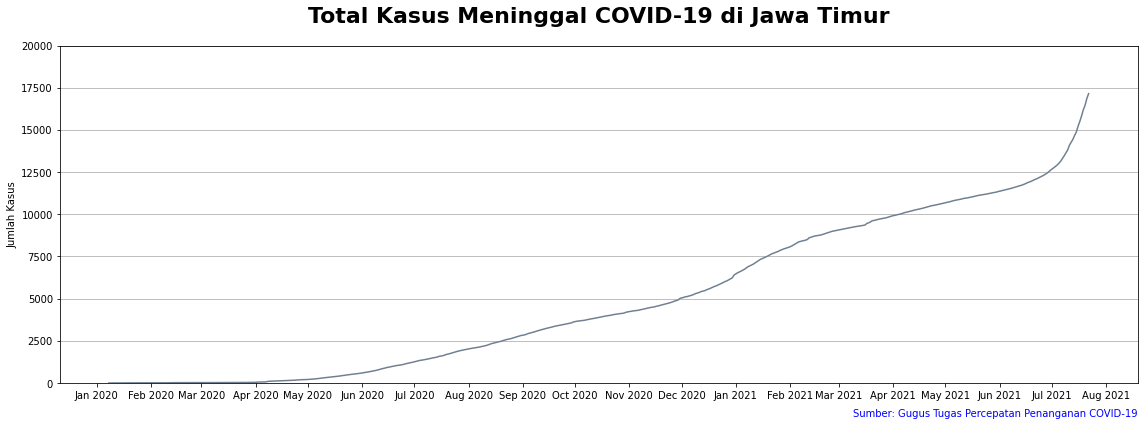

In [83]:
# Visualisasi Data Kasus Meninggal COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim['AKUMULASI_MENINGGAL'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di Jawa Timur',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

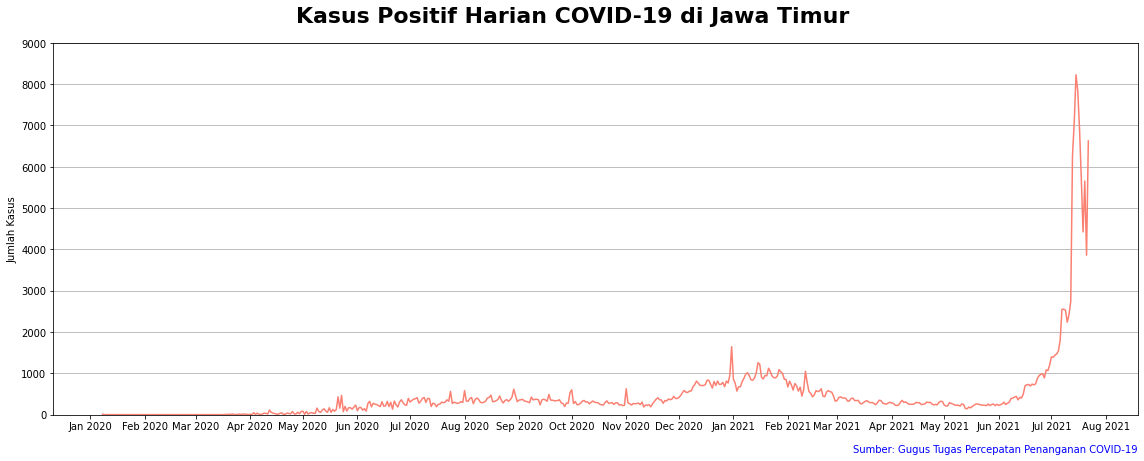

In [84]:
# Visualisasi Data Kasus Positif Harian COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim_tidy['kasus_baru'], color='salmon')
fig.suptitle('Kasus Positif Harian COVID-19 di Jawa Timur', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

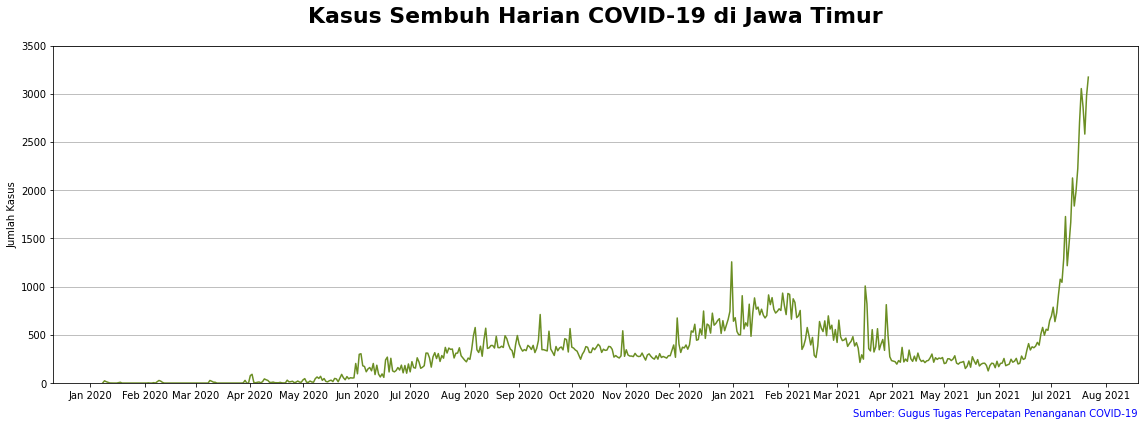

In [85]:
# Visualisasi Data Kasus Sembuh Harian COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim_tidy['sembuh'], color='olivedrab')
ax.set_title('Kasus Sembuh Harian COVID-19 di Jawa Timur',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

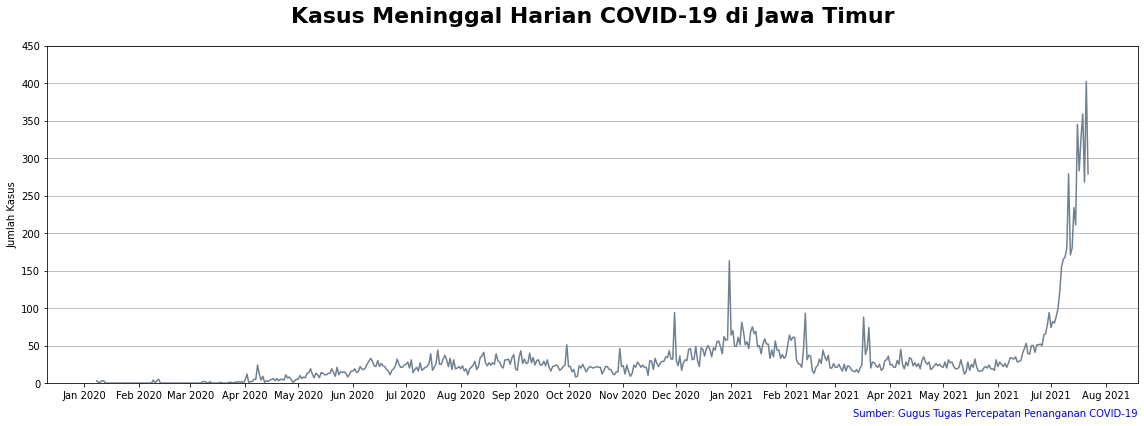

In [86]:
# Visualisasi Data Kasus Meninggal Harian COVID-19 di Jawa Timur

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(cov_jatim_tidy['tanggal'], cov_jatim_tidy['meninggal'], color='slategrey')
ax.set_title('Kasus Meninggal Harian COVID-19 di Jawa Timur',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Gugus Tugas Percepatan Penanganan COVID-19', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

# Prediksi Kasus COVID-19 di 4 Provinsi Tertinggi

# DKI Jakarta

# Prediksi Kasus di DKI Jakarta

In [87]:
from fbprophet import Prophet

In [88]:
df_dki=cov_jakarta_tidy[['tanggal','kasus_baru']]

In [89]:
df_conf_dki = df_dki.copy()

In [90]:
df_conf_dki.columns

Index(['tanggal', 'kasus_baru'], dtype='object')

In [91]:
df_conf_dki.columns=['ds','y']

In [92]:
model_dki = Prophet(interval_width=0.95)
model_dki.fit(df_conf_dki)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
future_dki = model_dki.make_future_dataframe(periods=30)

In [94]:
future_dki.tail()

,ds
534,2021-08-17
535,2021-08-18
536,2021-08-19
537,2021-08-20
538,2021-08-21


In [95]:
forecast_conf_dki = model_dki.predict(future_dki)

In [96]:
pd.options.display.float_format = '{: .2f}'.format

In [97]:
forecast_conf_dki.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
534,2021-08-17,8712.95,5701.04,11148.51,8549.94,8880.18,-261.95,-261.95,-261.95,-261.95,-261.95,-261.95,0.00,0.00,0.00,8450.99
535,2021-08-18,8770.93,5953.85,11642.79,8596.45,8946.55,-125.06,-125.06,-125.06,-125.06,-125.06,-125.06,0.00,0.00,0.00,8645.87
536,2021-08-19,8828.92,5976.19,11637.41,8643.24,9018.24,79.41,79.41,79.41,79.41,79.41,79.41,0.00,0.00,0.00,8908.33
537,2021-08-20,8886.90,6238.22,11950.24,8689.86,9084.40,95.33,95.33,95.33,95.33,95.33,95.33,0.00,0.00,0.00,8982.23
538,2021-08-21,8944.89,6025.66,11649.70,8738.53,9150.56,118.54,118.54,118.54,118.54,118.54,118.54,0.00,0.00,0.00,9063.43


In [98]:
forecast_conf_dki[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
534,2021-08-17,8450.99,5701.04,11148.51
535,2021-08-18,8645.87,5953.85,11642.79
536,2021-08-19,8908.33,5976.19,11637.41
537,2021-08-20,8982.23,6238.22,11950.24
538,2021-08-21,9063.43,6025.66,11649.70


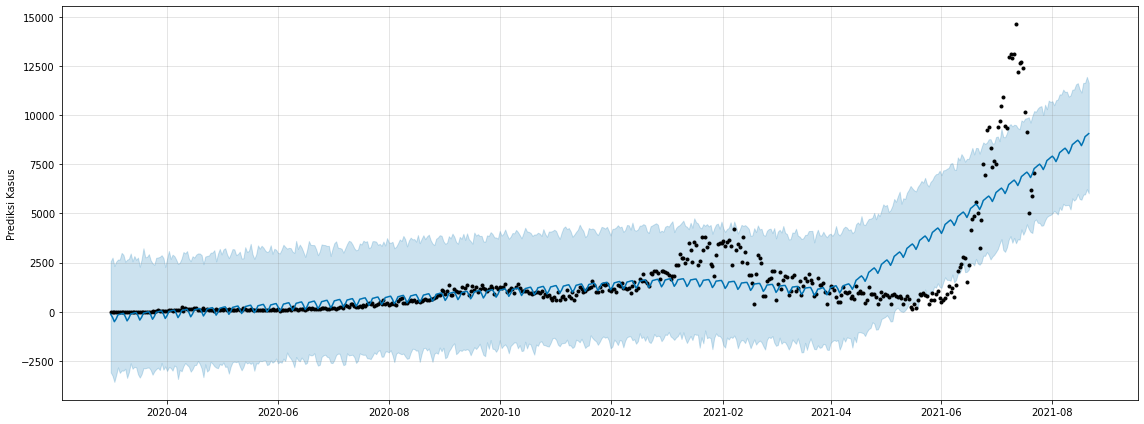

In [99]:
forecast_conf_plot_dki = model_dki.plot(forecast_conf_dki, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')

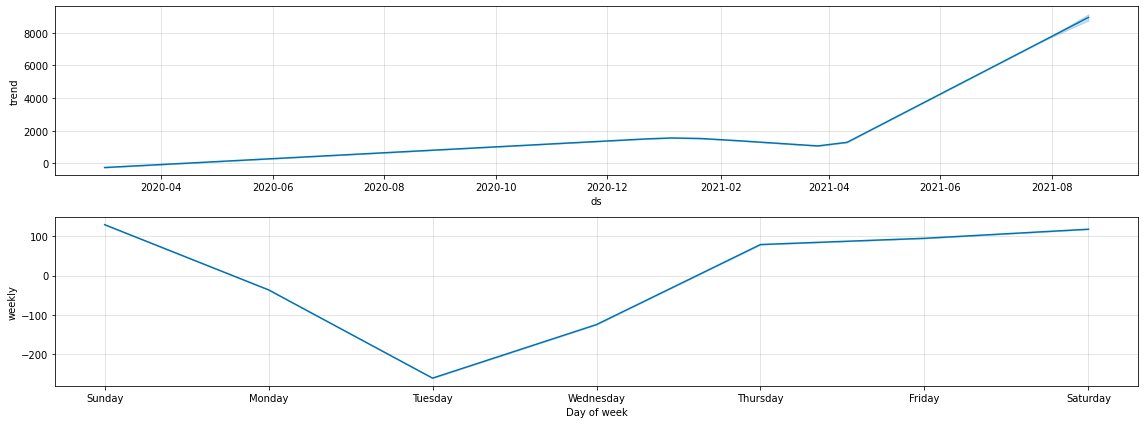

In [100]:
conf_forecast_plot_component_dki = model_dki.plot_components(forecast_conf_dki, figsize=(16, 6))

# Cross Validating the Time Series Model using Prophet - DKI Jakarta

In [101]:
from fbprophet.plot import add_changepoints_to_plot

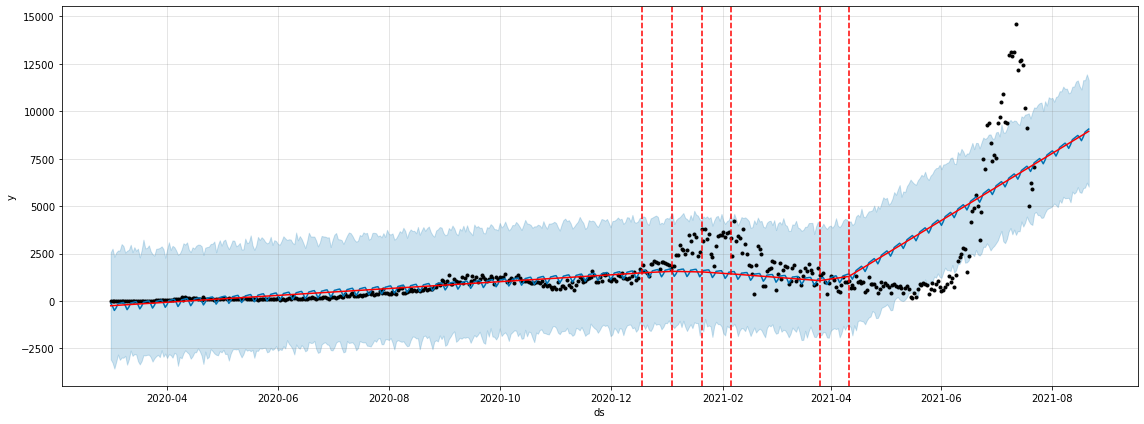

In [102]:
fig=model_dki.plot(forecast_conf_dki, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_dki, forecast_conf_dki)

In [103]:
from fbprophet.diagnostics import cross_validation

In [104]:
df_cv_dki=cross_validation(model_dki, horizon='30 days', period='15 days', initial='90 days')

INFO:fbprophet:Making 26 forecasts with cutoffs between 2020-06-12 00:00:00 and 2021-06-22 00:00:00


In [105]:
df_cv_dki.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-13,142.89,65.00,227.43,121,2020-06-12
1,2020-06-14,154.32,74.91,233.21,118,2020-06-12
2,2020-06-15,132.98,60.02,217.08,141,2020-06-12
3,2020-06-16,155.29,71.41,239.46,97,2020-06-12
4,2020-06-17,151.20,75.48,231.65,122,2020-06-12


In [106]:
df_cv_dki.shape

(780, 6)

# Obtain Performance Metrics for the Data - DKI Jakarta

In [107]:
from fbprophet.diagnostics import performance_metrics

In [108]:
df_performance_dki=performance_metrics(df_cv_dki)

In [109]:
df_performance_dki.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1452349.39,1205.13,581.30,0.38,0.26,0.58
1,4 days,2153690.26,1467.55,686.35,0.41,0.29,0.54
2,5 days,2547606.40,1596.12,745.33,0.41,0.29,0.50
3,6 days,2870389.07,1694.22,797.81,0.47,0.31,0.47
4,7 days,2595531.54,1611.07,768.76,0.46,0.27,0.46


In [110]:
df_performance_dki.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,8222180.93,2867.43,1569.49,0.81,0.52,0.19
24,27 days,7814315.00,2795.41,1579.89,0.88,0.55,0.15
25,28 days,7808280.31,2794.33,1592.24,0.93,0.51,0.13
26,29 days,7314614.15,2704.55,1541.46,0.82,0.50,0.12
27,30 days,7269423.67,2696.19,1577.15,0.83,0.51,0.10


In [111]:
from fbprophet.plot import plot_cross_validation_metric

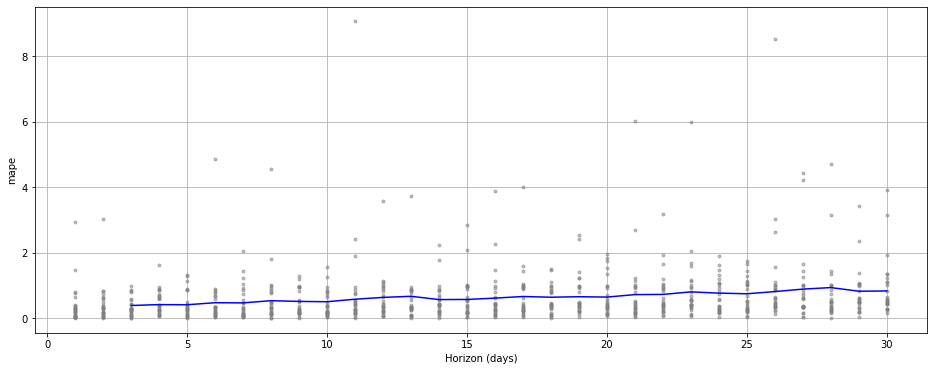

In [112]:
df_performance_dki=plot_cross_validation_metric(df_cv_dki, metric='mape', figsize=(16, 6))

# Jawa Barat

# Prediksi Kasus di Jawa Barat

In [113]:
from fbprophet import Prophet

In [114]:
df_jabar=cov_jabar_tidy[['tanggal','kasus_baru']]

In [115]:
df_conf_jabar = df_jabar.copy()

In [116]:
df_conf_jabar.columns

Index(['tanggal', 'kasus_baru'], dtype='object')

In [117]:
df_conf_jabar.columns=['ds','y']

In [118]:
model_jabar = Prophet(interval_width=0.95)
model_jabar.fit(df_conf_jabar)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
future_jabar = model_jabar.make_future_dataframe(periods=30)

In [120]:
future_jabar.tail()

,ds
533,2021-08-17
534,2021-08-18
535,2021-08-19
536,2021-08-20
537,2021-08-21


In [121]:
forecast_conf_jabar = model_jabar.predict(future_jabar)

In [122]:
pd.options.display.float_format = '{: .2f}'.format

In [123]:
forecast_conf_jabar.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
533,2021-08-17,6237.24,4195.92,8227.61,6119.77,6336.68,28.29,28.29,28.29,28.29,28.29,28.29,0.00,0.00,0.00,6265.53
534,2021-08-18,6277.11,4384.91,8292.23,6154.63,6381.68,53.63,53.63,53.63,53.63,53.63,53.63,0.00,0.00,0.00,6330.73
535,2021-08-19,6316.97,4473.94,8416.07,6189.49,6426.66,166.16,166.16,166.16,166.16,166.16,166.16,0.00,0.00,0.00,6483.13
536,2021-08-20,6356.83,4407.45,8508.18,6224.35,6470.98,77.28,77.28,77.28,77.28,77.28,77.28,0.00,0.00,0.00,6434.11
537,2021-08-21,6396.69,4273.99,8419.48,6259.21,6515.24,-83.74,-83.74,-83.74,-83.74,-83.74,-83.74,0.00,0.00,0.00,6312.95


In [124]:
forecast_conf_jabar[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
533,2021-08-17,6265.53,4195.92,8227.61
534,2021-08-18,6330.73,4384.91,8292.23
535,2021-08-19,6483.13,4473.94,8416.07
536,2021-08-20,6434.11,4407.45,8508.18
537,2021-08-21,6312.95,4273.99,8419.48


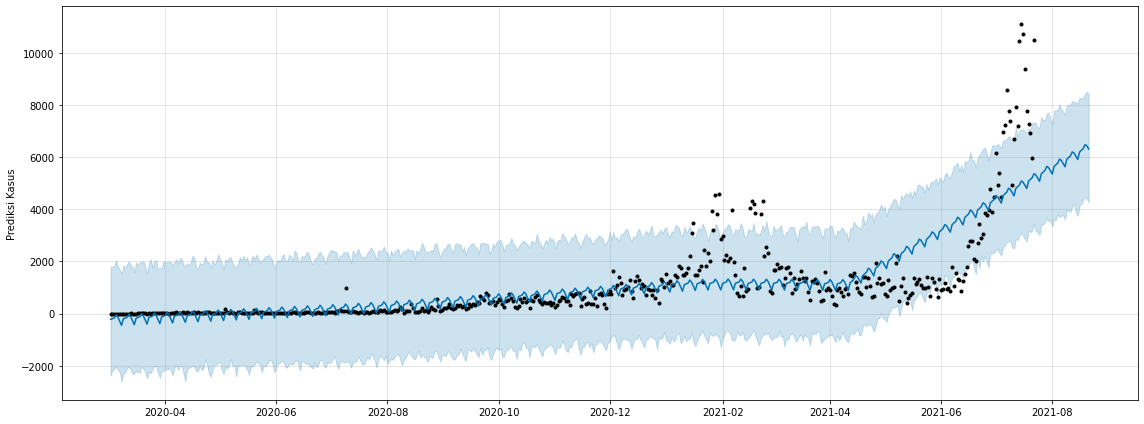

In [125]:
forecast_conf_plot_jabar = model_jabar.plot(forecast_conf_jabar, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')

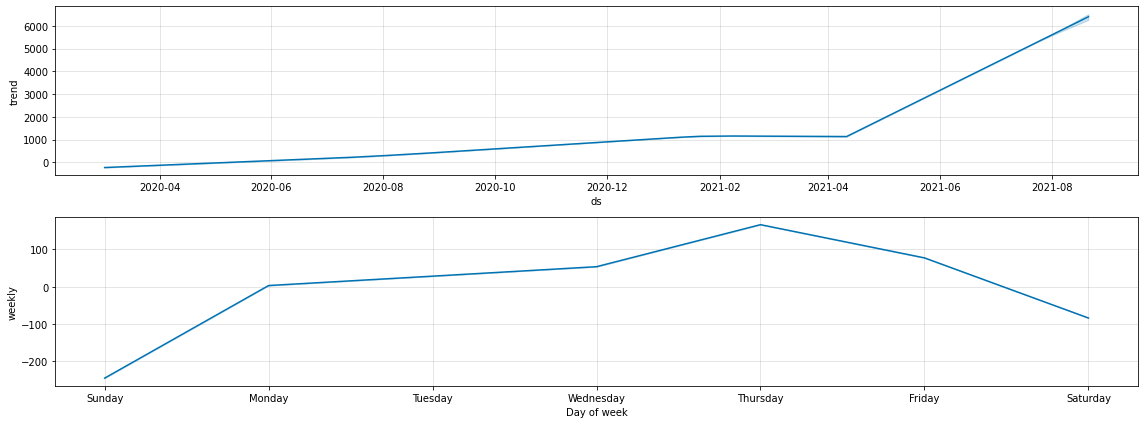

In [126]:
conf_forecast_plot_component_jabar = model_jabar.plot_components(forecast_conf_jabar, figsize=(16, 6))

# Cross Validating the Time Series Model using Prophet - Jawa Barat

In [127]:
from fbprophet.plot import add_changepoints_to_plot

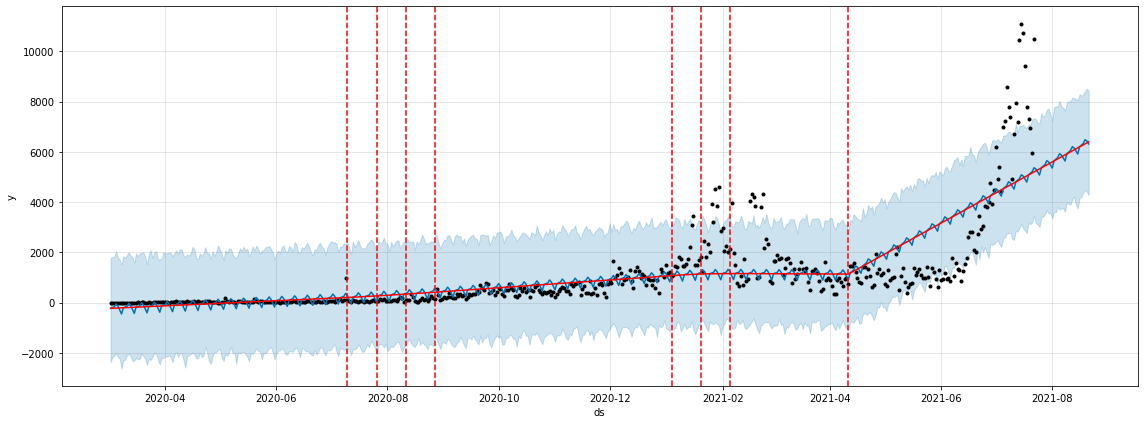

In [128]:
fig=model_jabar.plot(forecast_conf_jabar, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_jabar, forecast_conf_jabar)

In [129]:
from fbprophet.diagnostics import cross_validation

In [130]:
df_cv_jabar=cross_validation(model_jabar, horizon='30 days', period='15 days', initial='90 days')

INFO:fbprophet:Making 26 forecasts with cutoffs between 2020-06-12 00:00:00 and 2021-06-22 00:00:00


In [131]:
df_cv_jabar.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-13,41.58,-8.36,94.14,12,2020-06-12
1,2020-06-14,39.75,-8.54,87.30,15,2020-06-12
2,2020-06-15,54.28,6.30,103.01,24,2020-06-12
3,2020-06-16,40.97,-7.93,92.56,37,2020-06-12
4,2020-06-17,45.58,-2.59,93.71,43,2020-06-12


In [132]:
df_cv_jabar.shape

(780, 6)

# Obtain Performance Metrics for the Data - Jawa Barat

In [133]:
from fbprophet.diagnostics import performance_metrics

In [134]:
df_performance_jabar=performance_metrics(df_cv_jabar)

In [135]:
df_performance_jabar.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,589968.33,768.09,471.05,0.56,0.34,0.69
1,4 days,665100.23,815.54,488.39,0.60,0.29,0.67
2,5 days,836797.17,914.77,533.37,0.61,0.31,0.64
3,6 days,885612.81,941.07,544.90,0.58,0.32,0.64
4,7 days,995006.87,997.50,583.21,0.59,0.39,0.64


In [136]:
df_performance_jabar.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,4388182.03,2094.80,1121.26,0.76,0.48,0.40
24,27 days,3535091.30,1880.18,1056.65,0.79,0.47,0.42
25,28 days,3280611.53,1811.25,1033.24,0.74,0.47,0.42
26,29 days,3246969.80,1801.94,1029.00,0.70,0.55,0.41
27,30 days,4487295.57,2118.32,1122.87,0.66,0.50,0.38


In [137]:
from fbprophet.plot import plot_cross_validation_metric

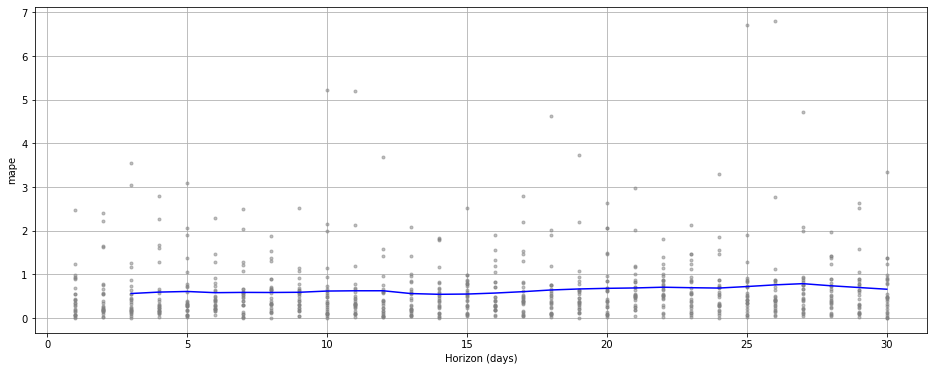

In [138]:
df_performance_jabar=plot_cross_validation_metric(df_cv_jabar, metric='mape', figsize=(16, 6))

# Jawa Tengah

# Prediksi Kasus di Jawa Tengah

In [139]:
from fbprophet import Prophet

In [140]:
df_jateng=cov_jateng_tidy[['tanggal','kasus_baru']]

In [141]:
df_conf_jateng = df_jateng.copy()

In [142]:
df_conf_jateng.columns

Index(['tanggal', 'kasus_baru'], dtype='object')

In [143]:
df_conf_jateng.columns=['ds','y']

In [144]:
model_jateng = Prophet(interval_width=0.95)
model_jateng.fit(df_conf_jateng)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
future_jateng = model_jateng.make_future_dataframe(periods=30)

In [146]:
future_jateng.tail()

,ds
527,2021-08-17
528,2021-08-18
529,2021-08-19
530,2021-08-20
531,2021-08-21


In [147]:
forecast_conf_jateng = model_jateng.predict(future_jateng)

In [148]:
pd.options.display.float_format = '{: .2f}'.format

In [149]:
forecast_conf_jateng.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
527,2021-08-17,4165.84,3375.25,5025.08,4029.01,4318.31,10.95,10.95,10.95,10.95,10.95,10.95,0.00,0.00,0.00,4176.80
528,2021-08-18,4197.64,3458.89,5005.70,4052.40,4356.08,14.61,14.61,14.61,14.61,14.61,14.61,0.00,0.00,0.00,4212.24
529,2021-08-19,4229.43,3460.60,5093.76,4075.76,4399.47,63.78,63.78,63.78,63.78,63.78,63.78,0.00,0.00,0.00,4293.21
530,2021-08-20,4261.23,3407.48,5106.07,4099.94,4439.92,-2.97,-2.97,-2.97,-2.97,-2.97,-2.97,0.00,0.00,0.00,4258.26
531,2021-08-21,4293.02,3443.21,5081.61,4122.56,4482.49,-10.32,-10.32,-10.32,-10.32,-10.32,-10.32,0.00,0.00,0.00,4282.70


In [150]:
forecast_conf_jateng[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,2021-08-17,4176.80,3375.25,5025.08
528,2021-08-18,4212.24,3458.89,5005.70
529,2021-08-19,4293.21,3460.60,5093.76
530,2021-08-20,4258.26,3407.48,5106.07
531,2021-08-21,4282.70,3443.21,5081.61


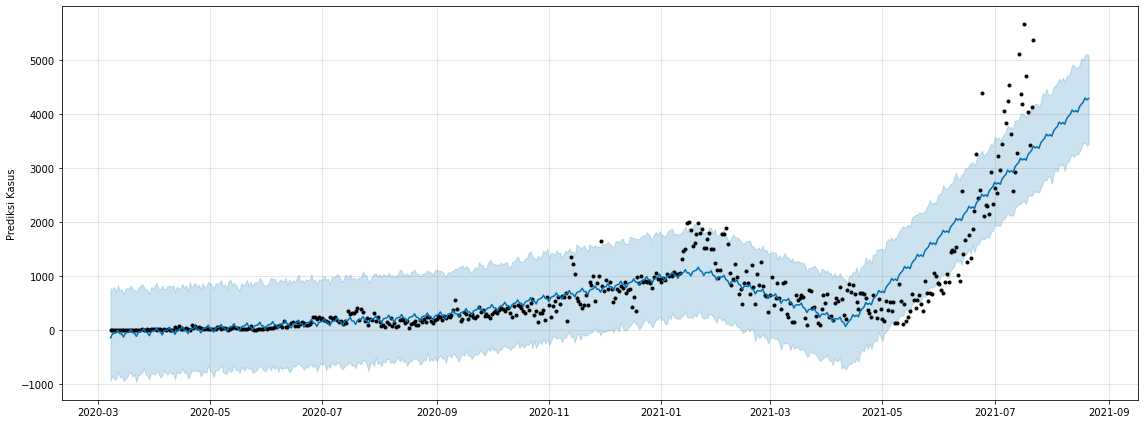

In [151]:
forecast_conf_plot_jateng = model_jateng.plot(forecast_conf_jateng, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')

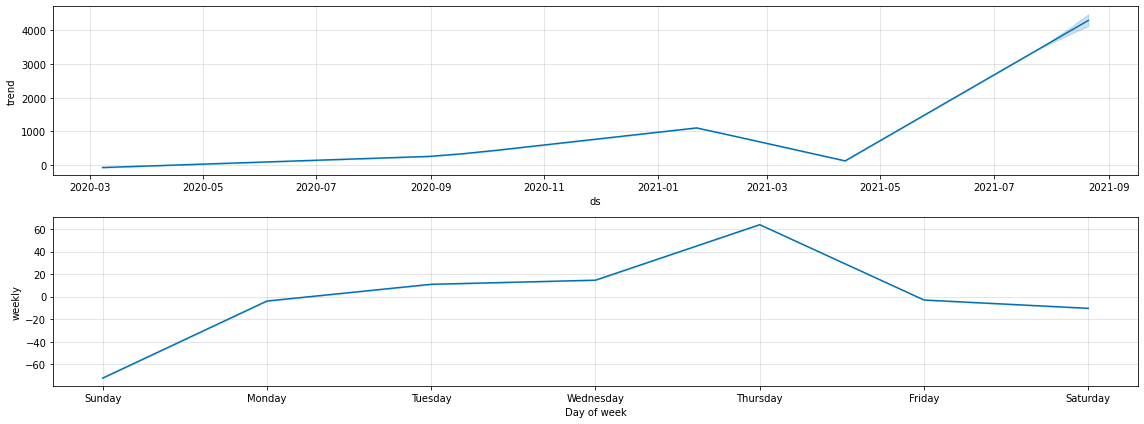

In [152]:
conf_forecast_plot_component_jateng = model_jateng.plot_components(forecast_conf_jateng, figsize=(16, 6))

# Cross Validating the Time Series Model using Prophet - Jawa Tengah

In [153]:
from fbprophet.plot import add_changepoints_to_plot

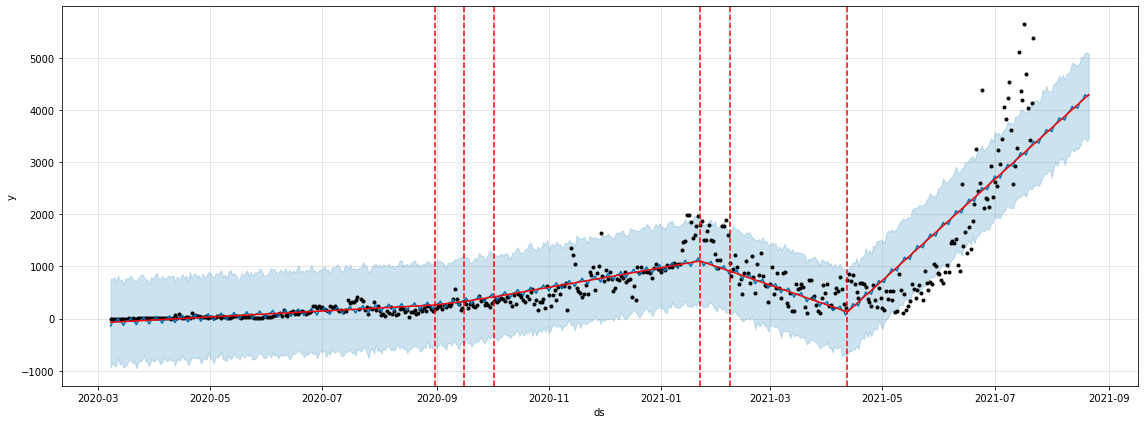

In [154]:
fig=model_jateng.plot(forecast_conf_jateng, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_jateng, forecast_conf_jateng)

In [155]:
from fbprophet.diagnostics import cross_validation

In [156]:
df_cv_jateng=cross_validation(model_jateng, horizon='30 days', period='15 days', initial='90 days')

INFO:fbprophet:Making 26 forecasts with cutoffs between 2020-06-12 00:00:00 and 2021-06-22 00:00:00


In [157]:
df_cv_jateng.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-13,59.36,17.24,98.92,101,2020-06-12
1,2020-06-14,56.66,15.07,97.46,128,2020-06-12
2,2020-06-15,50.16,5.67,90.27,149,2020-06-12
3,2020-06-16,62.02,19.26,103.66,83,2020-06-12
4,2020-06-17,68.09,24.77,108.27,144,2020-06-12


In [158]:
df_cv_jateng.shape

(780, 6)

# Obtain Performance Metrics for the Data - Jawa Tengah

In [159]:
from fbprophet.diagnostics import performance_metrics

In [160]:
df_performance_jateng=performance_metrics(df_cv_jateng)

In [161]:
df_performance_jateng.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,351996.84,593.29,317.67,0.57,0.38,0.54
1,4 days,352006.98,593.30,329.03,0.71,0.35,0.54
2,5 days,247742.83,497.74,336.33,0.78,0.38,0.50
3,6 days,318199.91,564.09,369.06,0.85,0.37,0.51
4,7 days,354033.05,595.01,380.95,0.72,0.39,0.51


In [162]:
df_performance_jateng.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,1164700.72,1079.21,606.44,0.85,0.46,0.40
24,27 days,1209541.85,1099.79,626.35,0.97,0.43,0.36
25,28 days,1097410.67,1047.57,620.07,0.92,0.42,0.38
26,29 days,1213900.06,1101.77,658.50,0.86,0.49,0.33
27,30 days,1435674.24,1198.20,692.18,0.73,0.52,0.36


In [163]:
from fbprophet.plot import plot_cross_validation_metric

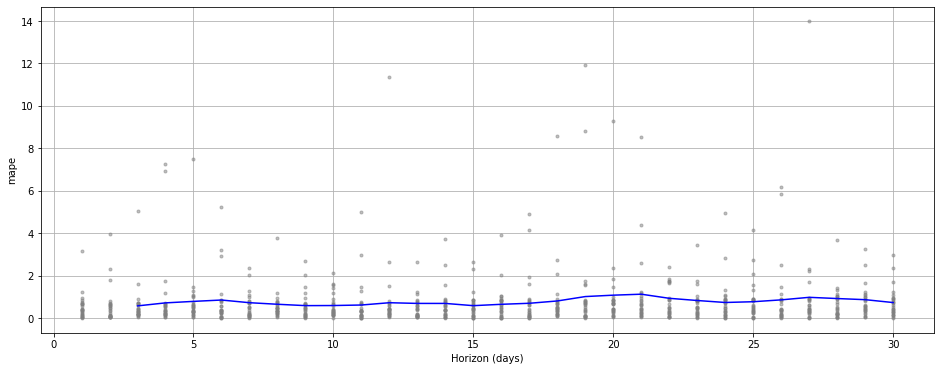

In [164]:
df_performance_jateng=plot_cross_validation_metric(df_cv_jateng, metric='mape', figsize=(16, 6))

# Jawa Timur

# Prediksi Kasus di Jawa Timur

In [165]:
from fbprophet import Prophet

In [166]:
df_jatim=cov_jatim_tidy[['tanggal','kasus_baru']]

In [167]:
df_conf_jatim = df_jatim.copy()

In [168]:
df_conf_jatim.columns

Index(['tanggal', 'kasus_baru'], dtype='object')

In [169]:
df_conf_jatim.columns=['ds','y']

In [170]:
model_jatim = Prophet(interval_width=0.95)
model_jatim.fit(df_conf_jatim)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
future_jatim = model_jatim.make_future_dataframe(periods=30)

In [172]:
future_jatim.tail()

,ds
587,2021-08-17
588,2021-08-18
589,2021-08-19
590,2021-08-20
591,2021-08-21


In [173]:
forecast_conf_jatim = model_jatim.predict(future_jatim)

In [174]:
pd.options.display.float_format = '{: .2f}'.format

In [175]:
forecast_conf_jatim.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
587,2021-08-17,2795.91,1440.36,4121.99,2738.32,2851.56,0.22,0.22,0.22,0.22,0.22,0.22,0.00,0.00,0.00,2796.14
588,2021-08-18,2814.60,1519.07,4222.65,2753.75,2873.03,21.32,21.32,21.32,21.32,21.32,21.32,0.00,0.00,0.00,2835.92
589,2021-08-19,2833.29,1599.38,4266.09,2768.88,2896.42,91.00,91.00,91.00,91.00,91.00,91.00,0.00,0.00,0.00,2924.29
590,2021-08-20,2851.98,1574.82,4211.16,2783.64,2916.71,19.68,19.68,19.68,19.68,19.68,19.68,0.00,0.00,0.00,2871.66
591,2021-08-21,2870.67,1541.29,4142.39,2796.85,2939.42,-5.71,-5.71,-5.71,-5.71,-5.71,-5.71,0.00,0.00,0.00,2864.96


In [176]:
forecast_conf_jatim[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
587,2021-08-17,2796.14,1440.36,4121.99
588,2021-08-18,2835.92,1519.07,4222.65
589,2021-08-19,2924.29,1599.38,4266.09
590,2021-08-20,2871.66,1574.82,4211.16
591,2021-08-21,2864.96,1541.29,4142.39


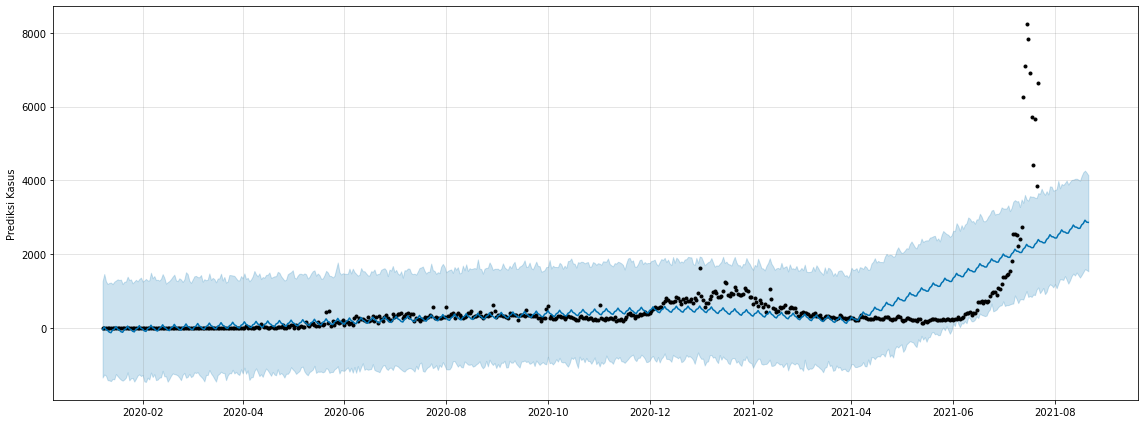

In [177]:
forecast_conf_plot_jatim = model_jatim.plot(forecast_conf_jatim, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')

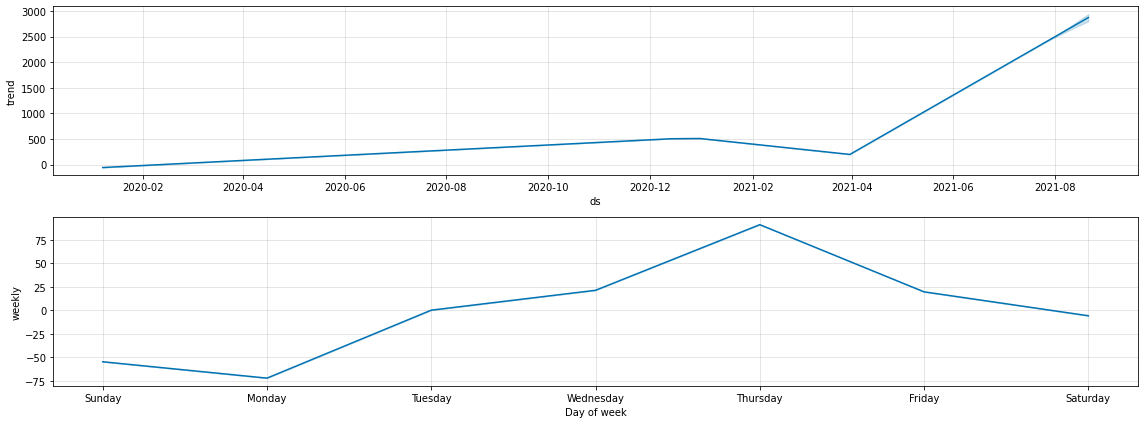

In [178]:
conf_forecast_plot_component_jatim = model_jatim.plot_components(forecast_conf_jatim, figsize=(16, 6))

# Cross Validating the Time Series Model using Prophet - Jawa Timur

In [179]:
from fbprophet.plot import add_changepoints_to_plot

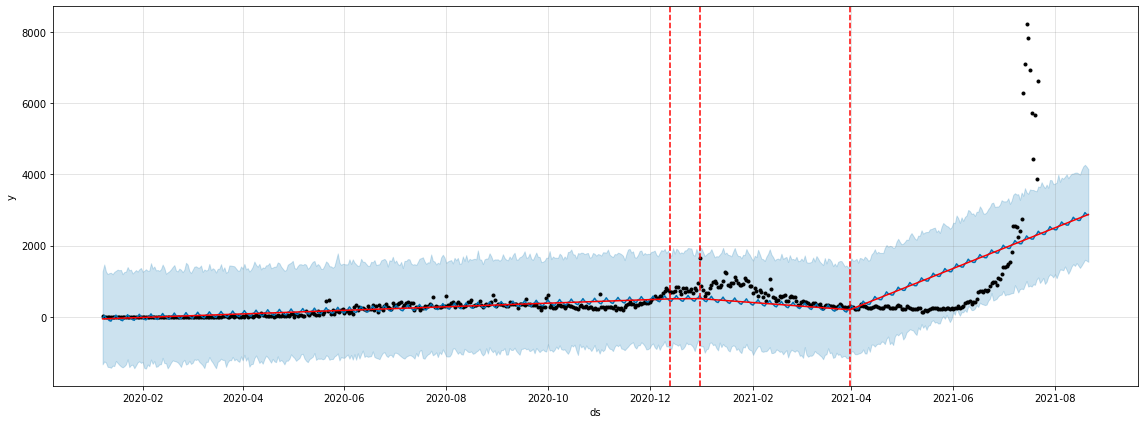

In [180]:
fig=model_jatim.plot(forecast_conf_jatim, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_jatim, forecast_conf_jatim)

In [181]:
from fbprophet.diagnostics import cross_validation

In [182]:
df_cv_jatim=cross_validation(model_jatim, horizon='30 days', period='15 days', initial='90 days')

INFO:fbprophet:Making 30 forecasts with cutoffs between 2020-04-13 00:00:00 and 2021-06-22 00:00:00


In [183]:
df_cv_jatim.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-14,22.88,3.24,43.75,36,2020-04-13
1,2020-04-15,26.64,5.39,47.06,25,2020-04-13
2,2020-04-16,27.32,7.47,47.36,13,2020-04-13
3,2020-04-17,30.39,10.92,51.64,10,2020-04-13
4,2020-04-18,27.46,7.65,48.64,34,2020-04-13


In [184]:
df_cv_jatim.shape

(900, 6)

# Obtain Performance Metrics for the Data - Jawa Timur

In [185]:
from fbprophet.diagnostics import performance_metrics

In [186]:
df_performance_jatim=performance_metrics(df_cv_jatim)

In [187]:
df_performance_jatim.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,50427.60,224.56,158.94,0.43,0.36,0.64
1,4 days,52610.74,229.37,157.98,0.49,0.37,0.62
2,5 days,50821.13,225.44,157.26,0.49,0.37,0.58
3,6 days,58182.89,241.21,163.43,0.50,0.35,0.61
4,7 days,81345.80,285.21,193.05,0.54,0.36,0.56


In [188]:
df_performance_jatim.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,1692607.94,1301.00,522.44,0.76,0.57,0.26
24,27 days,1253928.75,1119.79,494.35,0.77,0.60,0.19
25,28 days,1095247.88,1046.54,482.38,0.75,0.54,0.20
26,29 days,923260.21,960.86,475.47,0.78,0.56,0.19
27,30 days,1237594.60,1112.47,519.91,0.80,0.60,0.20


In [189]:
from fbprophet.plot import plot_cross_validation_metric

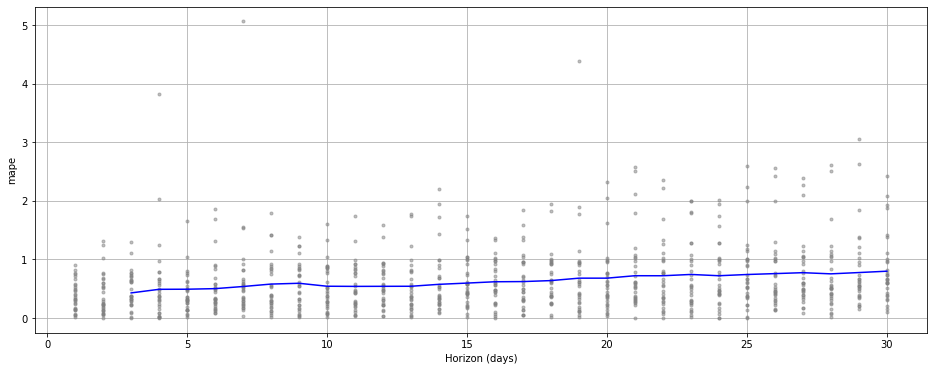

In [190]:
df_performance_jatim=plot_cross_validation_metric(df_cv_jatim, metric='mape', figsize=(16, 6))